In [1]:
# source activate python2
# sshfs ascott47@jhu.edu@gajteway2.marcc.jhu.edu:/scratch/groups/bzaitch1/badr/wrf/WRFV3/run/ mountpoint/
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import matplotlib.cm as cm
import scipy.spatial
from netCDF4 import Dataset
from wrf import getvar
#### 
#/scratch/groups/bzaitch1/shared/out/WRF/Baltimore/. It includes 3 directories: UCM (old/reference simulations), UCM2D (planned), and BEM (running).
#### /scratch/groups/bzaitch1/badr/wrf/WRFV3/run/wrfout*
# sshfs ascott47@jhu.edu@gateway2.marcc.jhu.edu:/scratch/groups/bzaitch1/badr/wrf/WRFV3/run/ mountpoint/

import scipy.stats
# define plots
def easy_scatter(x,y,title='', xlabel='', ylabel='') : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    r, p = scipy.stats.pearsonr(x[ind], y[ind]) #np.corrcoef(x[ind],y[ind])[0,1]
    plt.scatter(x,y, color = 'grey')
    plt.plot(x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('r = %.2f'%(r), xy=(.5, .85), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('p = %.2f'%(p), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('N = %i'%(ind.shape), xy=(.5, .75), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    return m, r, p
plt.style.use('ggplot')
# read in temp data 
filepath = '../cityheat/Bmore/2016/'

meta = pd.DataFrame(pd.read_csv(filepath + 'data/CleanedMeta2016.csv', sep = ','))
meta = meta.set_index('sensornumber', drop = False)
meta = meta.set_index(meta.index.astype('float64'), drop = False)
#mean_temp = pd.read_csv('meantemp.csv', header=-1).rename(columns = {0: 'SensorNumber', 1:'MeanTemp'}).set_index('SensorNumber')
tempDF = pd.read_csv(filepath + 'data/CleanedTemp2016.csv', parse_dates = [0]).set_index('Date').resample('H', how = 'first')#.first()
tempDF.columns = tempDF.columns.astype('int')

rhDF = pd.read_csv(filepath + 'data/CleanedRH2016.csv', parse_dates = [0]).set_index('Date').resample('H', how = 'first')
rhDF.columns = rhDF.columns.astype('int')

urban = 97 # science center
rural = 68 # darryn's house

analysis_points = meta.loc[[urban,rural]][['location:Longitude', 'location:Latitude']]
analysis_points = meta.loc[[urban,rural]][['location:Longitude', 'location:Latitude']]
analysis_points.index = ['urban', 'rural']
analysis_points

/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime
/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:44: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:47: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()


location:Longitude  location:Latitude
urban          -76.611088          39.281527
rural          -76.706294          39.479408

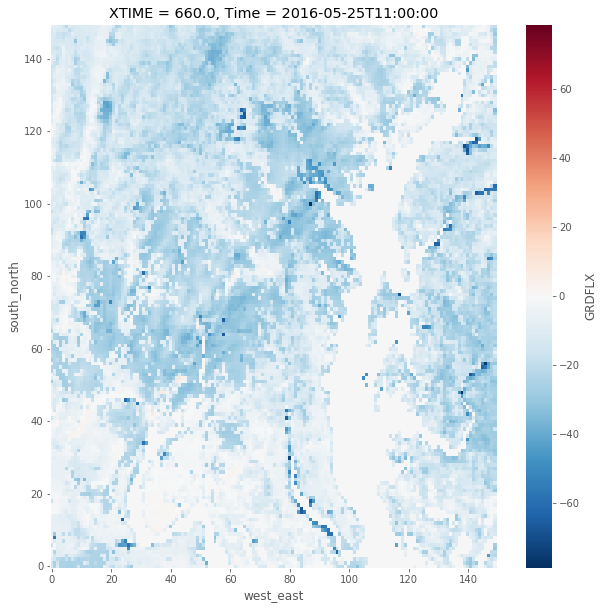

In [8]:
# 1km runs 
# /scratch/groups/bzaitch1/shared/out/WRF/Baltimore/
#sshfs ascott47@jhu.edu@gateway2.marcc.jhu.edu:/scratch/groups/bzaitch1/shared/out/WRF/Baltimore/ mountpoint/
# Creating 2D urban fraction from NLCD 2011
# Using 40-class NLCD 2011 for land use
# Using BEP+BEM urban physics option
# Using 2-way nesting (one simulation for all domains)
# Updating SST from high-resolution RTG_SST

ncfile = Dataset('/Users/ascott47/mountpoint/wrfout_d03_2016-05-25_11:00:00') # 10am UTC is 6am local
sh = getvar(ncfile, "GRDFLX")
sh.plot(figsize = [10,10])

In [5]:
import scipy.spatial
from netCDF4 import Dataset
from wrf import getvar

In [2]:
meta.loc[97]

sensornumber                                                         97
meta:instanceID               uuid:a0c24290-c9d3-400f-9531-db6f35608f8f
oldsensornumber                                                      97
location:Latitude                                               39.2815
location:Longitude                                             -76.6111
location:Altitude                                                   -27
location:Accuracy                                                   4.9
direction                                                             0
sunorshade                                                      partial
attachment                                                         tree
landcoverclass                                                    grass
vesasitenumber                                                      NaN
vesacategory                                                        NaN
picture               https://bmorecoolodk.appspot.com/view/bina

In [3]:
meta.loc[97]

sensornumber                                                         97
meta:instanceID               uuid:a0c24290-c9d3-400f-9531-db6f35608f8f
oldsensornumber                                                      97
location:Latitude                                               39.2815
location:Longitude                                             -76.6111
location:Altitude                                                   -27
location:Accuracy                                                   4.9
direction                                                             0
sunorshade                                                      partial
attachment                                                         tree
landcoverclass                                                    grass
vesasitenumber                                                      NaN
vesacategory                                                        NaN
picture               https://bmorecoolodk.appspot.com/view/bina

In [68]:
# 1km runs 
# /scratch/groups/bzaitch1/shared/out/WRF/Baltimore/d03/
#sshfs ascott47@jhu.edu@gateway2.marcc.jhu.edu:/scratch/groups/bzaitch1/shared/out/WRF/Baltimore/ mountpoint/
import time
files = list(np.sort(glob.glob('/Users/ascott47/mountpoint/d03/wrfout_*')))
urban_temps = np.ones(len(files))
rural_temps = np.ones(len(files))

times = []
i = 0
toc = time.time()
for file in files: 
    ncfile = nc(file, 'r')
    urban_temps[i] = ncfile.variables['T2'][:,urban_location[1],urban_location[0]]
    rural_temps[i] = ncfile.variables['T2'][:,rural_location[1],rural_location[0]]

    times.append(file[-19:])
    ncfile.close()
    i = i+1
print time.time() -toc

770.192194939


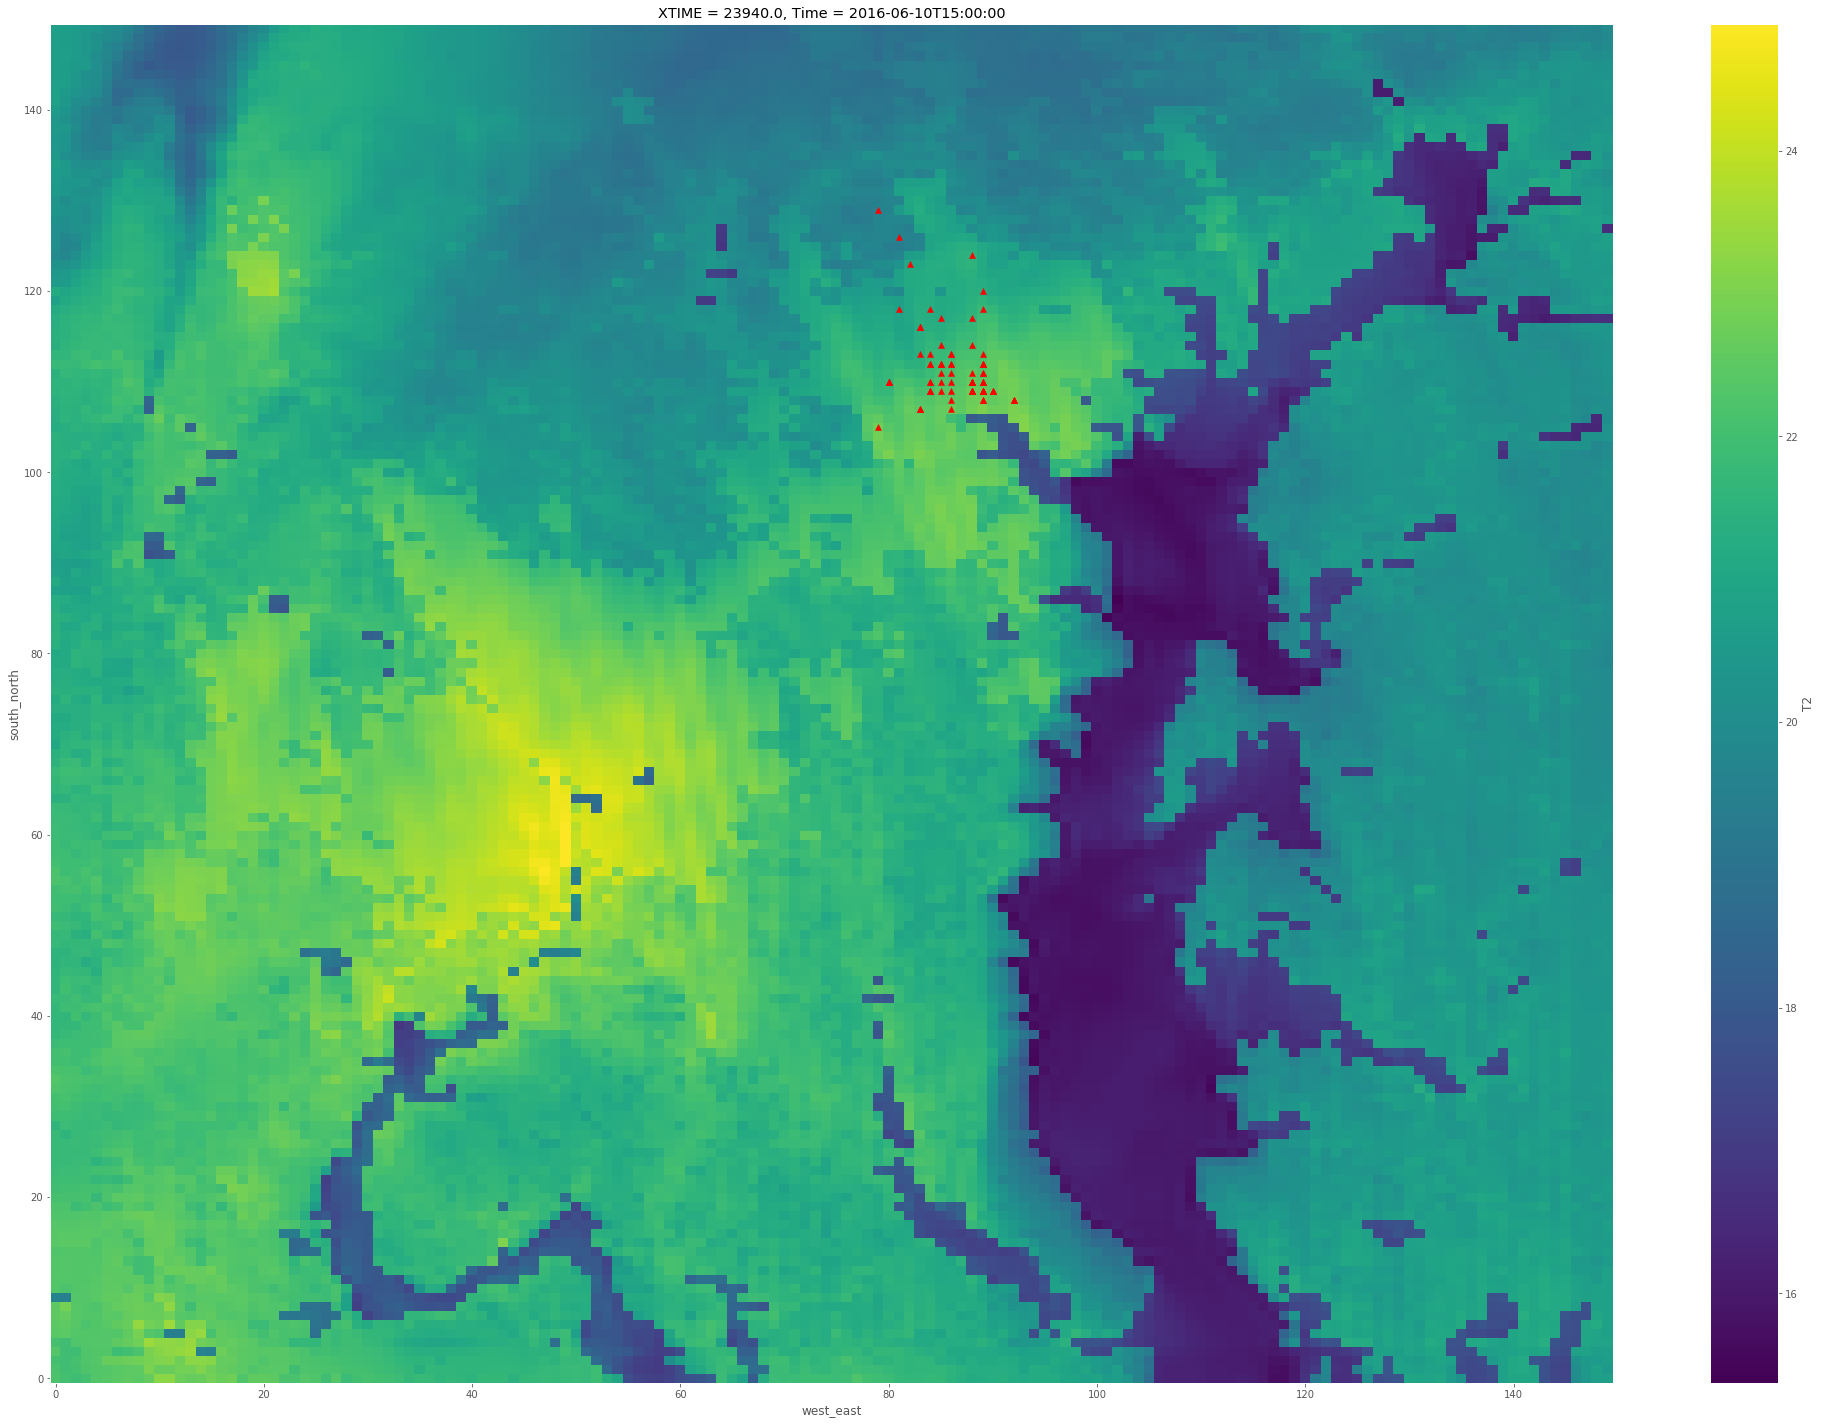

In [424]:
# snap points to grid and get coordinate locations of the points
fig  = (t2-273.15).plot(figsize = [35,25])
ax = fig.get_axes()

analysis_points = meta[['location:Longitude', 'location:Latitude']].dropna()
unique_locations = []
for point in analysis_points.values: 
    results = tree.query(point, k = 5, distance_upper_bound=1) # lookup closest points; returns first row as distance and second row as index
    location = df.iloc[results[1][0]].name # get the 'name', or coordinate location, of the points
    if location not in unique_locations: 
        unique_locations.append(location)
    ax.scatter(location[1], location[0],  marker = '^', color = 'r')


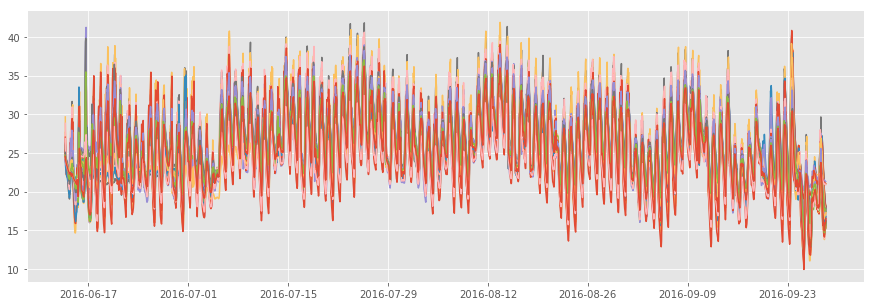

In [425]:
#dummy_x = np.linspace(-76.5, -76.7,100)
grid_x = t2.coords['XLONG'].values#np.linspace(-77.62, -75.869, 100)
grid_y = t2.coords['XLAT'].values#np.linspace(39.3, 39.27, 100)
#grid_x, grid_y = np.meshgrid(dummy_x, dummy_y)

points_x = meta['location:Longitude'].dropna().values #np.linspace(1, 100, 86)
points_y = meta['location:Latitude'].dropna().values #np.linspace(1, 100, 86)

temp = tempDF[meta['location:Longitude'].dropna().index].values.T

gridded_temp = scipy.interpolate.griddata(np.vstack([points_x, points_y]).T, 
                                  temp, 
                                  (grid_x, grid_y), 
                                  method = 'linear'
                                  )
plt.figure(figsize=[15,5])
for loc in unique_locations: 
    plt.plot(tempDF.index, gridded_temp[loc])
# plt.figure(figsize=[15,15])
# plt.imshow(grid_z0.T,
#            #extent=(0,1,0,1), 
#            origin='lower', cmap = 'hot')
# plt.colorbar()

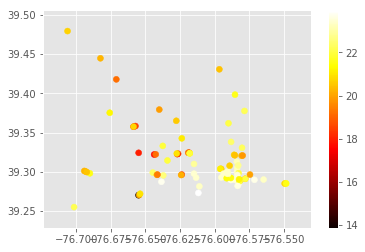

In [807]:
plt.scatter(meta['location:Longitude'], meta['location:Latitude'], c = tempDF[tempDF.index.hour ==6].mean().values, cmap = 'hot')
plt.colorbar()

In [600]:
# read in WRF data at points to be analyzed

files = list(np.sort(glob.glob('/Users/ascott47/mountpoint/d03/wrfout_*')))
#temps = np.ones([len(files), len(unique_locations), len(unique_locations)])
temps = np.ones([len(files), len(unique_locations)])

# redefine unique points as np array
selected_locations = np.ones([len(unique_locations),2], int)
for i in range(0,len(unique_locations)): 
    selected_locations[i,0] = unique_locations[i][0]
    selected_locations[i,1] = unique_locations[i][1]

# read in data
times = []
i = 0
toc = time.time()
for file in files: 
    ncfile = nc(file, 'r')
    for ii in range(0,43) : 
        temps[i,ii]  = ncfile.variables['T2'][:,selected_locations[ii,0], selected_locations[ii,1]]
    #temps[i,:,:] = ncfile.variables['T2'][:,selected_locations[:,0], selected_locations[:,1]]
    times.append(file[-19:])
    ncfile.close()
    i = i+1
print time.time() -toc

889.82542491


In [621]:
# make xarray dataset of wrf temps
t = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S') 
t = t- pd.Timedelta('04:00:00')
wrf_temp = xr.DataArray(temps-273.15, coords = [t, range(0,43)], 
                        dims = ['time', 'loc'])
wrf_temp

<xarray.DataArray (time: 2353, loc: 43)>
array([[ 20.825098,  21.19021 ,  20.417017, ...,  20.967828,  20.34231 ,
         20.683435],
       [ 18.886346,  18.258539,  18.380212, ...,  19.868707,  19.773798,
         18.399103],
       [ 18.270624,  17.901361,  16.493494, ...,  19.077081,  19.477686,
         18.223199],
       ..., 
       [ 30.864252,  31.443384,  30.804956, ...,  30.962854,  29.135797,
         31.005365],
       [ 30.049066,  30.556177,  30.131311, ...,  28.481317,  28.248865,
         30.251825],
       [ 26.485254,  26.312677,  26.645441, ...,  25.127313,  26.5422  ,
         27.016656]])
Coordinates:
  * time     (time) datetime64[ns] 2016-05-24T20:00:00 2016-05-24T21:00:00 ...
  * loc      (loc) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [609]:
# make gridded obs
obs_temp = xr.DataArray(gridded_temp[selected_locations[:,0], selected_locations[:,1], :].T, 
                  coords = [tempDF.index,  range(0,43)], 
                        dims = ['time', 'loc'],
                ) 

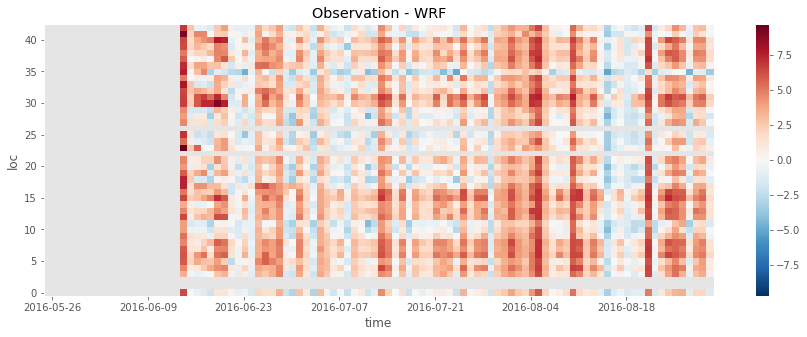

In [628]:
# compute mean differences between the curves gridded_temptgridded_tempour = 6

(obs_temp[obs_temp.indexes['time'].hour == 6] -wrf_temp[wrf_temp.indexes['time'].hour ==6]).T.plot(figsize = [15,5])
plt.title('Observation - WRF')

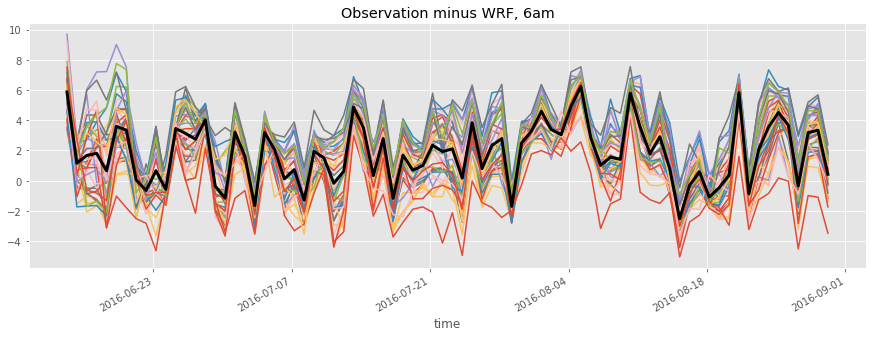

In [712]:
plt.figure(figsize=[15,5])
for i in range(0,43):
    (obs_temp[obs_temp.indexes['time'].hour == 6] -wrf_temp[wrf_temp.indexes['time'].hour ==6])[:,i].plot()
    
(obs_temp[obs_temp.indexes['time'].hour == 6] -wrf_temp[wrf_temp.indexes['time'].hour ==6]).mean(axis=1).plot(color='k',linewidth =3)
plt.title('Observation minus WRF, 6am')

In [711]:
(obs_temp[obs_temp.indexes['time'].hour == 6] -wrf_temp[wrf_temp.indexes['time'].hour ==6]).mean(axis=1).mean()

<xarray.DataArray ()>
array(1.8112607387132253)

<xarray.DataArray ()>
array(-1.4821276084833568)

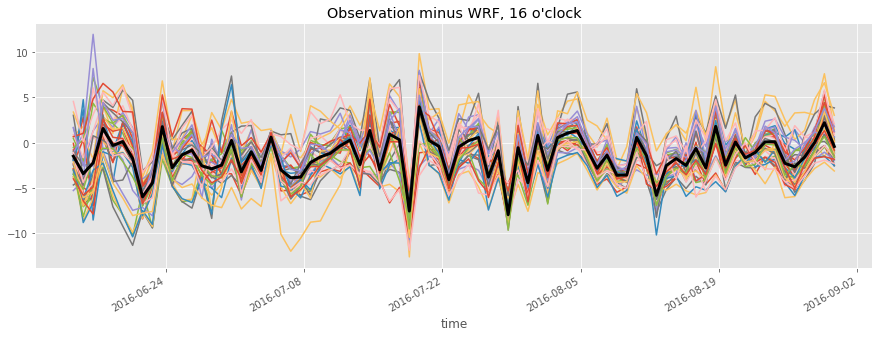

In [713]:
hour = 16
plt.figure(figsize=[15,5])
for i in range(0,43):
    (obs_temp[obs_temp.indexes['time'].hour == hour] -wrf_temp[wrf_temp.indexes['time'].hour ==hour])[:,i].plot()
    
(obs_temp[obs_temp.indexes['time'].hour == hour] -wrf_temp[wrf_temp.indexes['time'].hour ==hour]).mean(axis=1).plot(color='k',linewidth =3)
plt.title('Observation minus WRF, %s o\'clock'%hour)
(obs_temp[obs_temp.indexes['time'].hour == hour] -wrf_temp[wrf_temp.indexes['time'].hour ==hour]).mean(axis=1).mean()

In [965]:
obs_temp.indexes['time'].month == 5

array([ True,  True,  True, ..., False, False, False], dtype=bool)

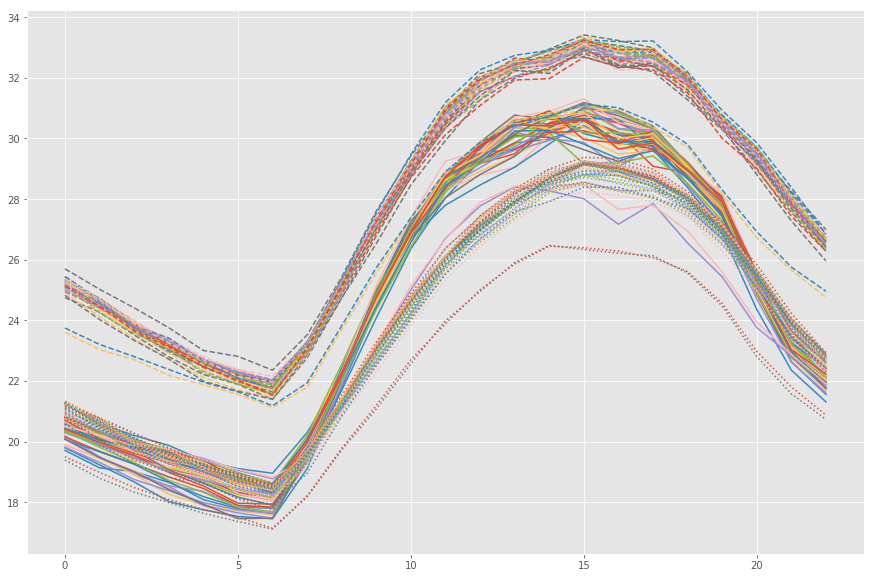

In [983]:
diurnal = np.ones([23, 43])
diurnal_j = np.ones([23, 43])
diurnal_jl = np.ones([23, 43])
for i in range(0,23): 
    diurnal[i,:] = wrf_temp[(wrf_temp.indexes['time'].hour == i) & (wrf_temp.indexes['time'].month == 5)].mean(axis=0)
    diurnal_j[i,:] = wrf_temp[(wrf_temp.indexes['time'].hour == i) & (wrf_temp.indexes['time'].month == 6)].mean(axis=0)
    diurnal_jl[i,:] = wrf_temp[(wrf_temp.indexes['time'].hour == i) & (wrf_temp.indexes['time'].month == 7)].mean(axis=0)

plt.figure(figsize=[15,10])
handle = plt.plot(diurnal, label = 'May')
handle = plt.plot(diurnal_j, ':', label = 'June')
handle = plt.plot(diurnal_jl, '--', label = 'July')

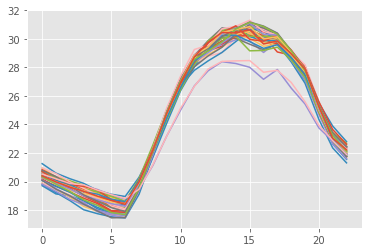

In [990]:
handle = plt.plot(diurnal)

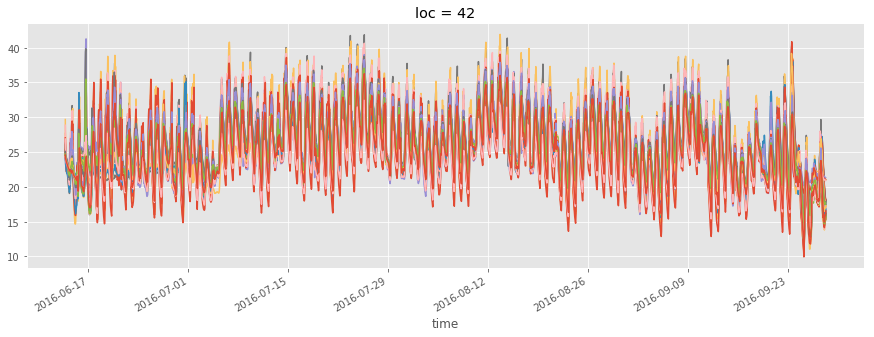

In [955]:
plt.figure(figsize=[15,5])
for i in range(0,43):
    obs_temp[:,i].plot()
     #wrf_temp[wrf_temp.indexes['time'].hour ==hour])[:,i].plot()


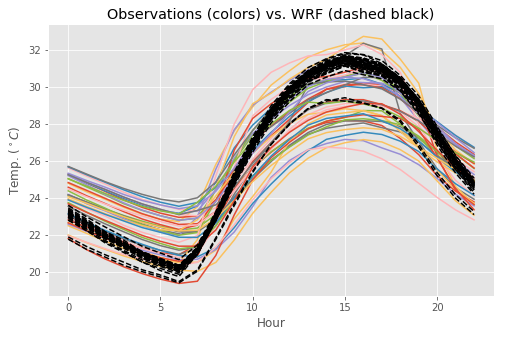

In [710]:
diurnal = np.ones([23, 43])
diurnal_w = np.ones([23, 43])
plt.figure(figsize =[8,5])
for i in range(0,23): 
    diurnal[i,:] = obs_temp[obs_temp.indexes['time'].hour == i].mean(axis=0)
    diurnal_w[i,:] = wrf_temp[wrf_temp.indexes['time'].hour == i].mean(axis=0)

handle = plt.plot(diurnal, label = 'obs')
handle = plt.plot(diurnal_w, '--k', label = 'WRF')
plt.title('Observations (colors) vs. WRF (dashed black)')
plt.xlabel('Hour')
plt.ylabel('Temp. ($^\circ C$)')

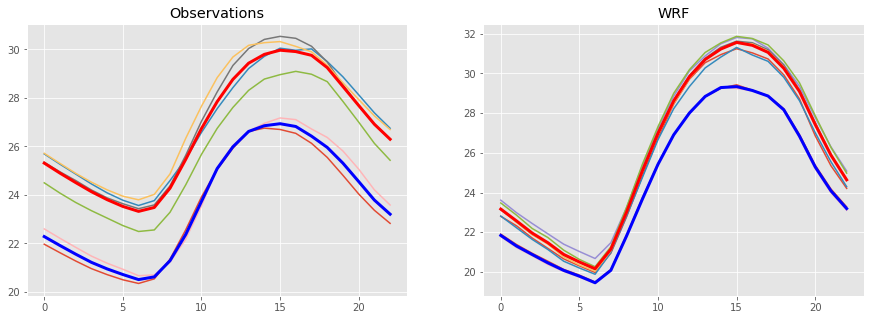

In [869]:
fig,ax = plt.subplots(1,2, sharex=True, figsize = [15,5])
# observations
rur = np.where(selected_locations[:,0] > 125)[0]
urb = np.where(selected_locations[:,0] <= 108)[0]
diurnal_r = np.ones([23, rur.shape[0]])
diurnal_u = np.ones([23, urb.shape[0]])
for i in range(0,23): 
    diurnal_r[i,:] = obs_temp[obs_temp.indexes['time'].hour == i, rur].mean(axis=0)
    diurnal_u[i,:] = obs_temp[obs_temp.indexes['time'].hour == i, urb].mean(axis=0)
handle = ax[0].plot(diurnal_u, label = 'obs')
ax[0].plot(np.nanmean(diurnal_u,axis =1), linewidth = 3, color = 'r')
handle = ax[0].plot(diurnal_r, label = 'obs')
ax[0].plot(np.nanmean(diurnal_r,axis =1), linewidth = 3, color = 'b')
ax[0].set_title('Observations')
ax[0].set_ylim

diurnal_r = np.ones([23, rur.shape[0]])
diurnal_u = np.ones([23, urb.shape[0]])
for i in range(0,23): 
    diurnal_r[i,:] = wrf_temp[wrf_temp.indexes['time'].hour == i, rur].mean(axis=0)
    diurnal_u[i,:] = wrf_temp[wrf_temp.indexes['time'].hour == i, urb].mean(axis=0)
handle = ax[1].plot(diurnal_u, label = 'obs')
ax[1].plot(np.nanmean(diurnal_u,axis =1), linewidth = 3, color = 'r')
handle = ax[1].plot(diurnal_r, label = 'obs')
ax[1].plot(np.nanmean(diurnal_r,axis =1), linewidth = 3, color = 'b')
ax[1].set_title('WRF')


In [953]:
np.nanmean(diurnal_u,axis =1) - np.nanmean(diurnal_r,axis =1)

array([ 1.32545554,  1.2640644 ,  1.07981904,  1.01283664,  0.8040773 ,
        0.71445994,  0.70566196,  1.06174069,  1.19987804,  1.42160927,
        1.55931268,  1.70438234,  1.82752685,  1.8594105 ,  1.9406675 ,
        2.22577314,  2.27342873,  2.1973249 ,  2.08748933,  2.25090286,
        2.13679756,  1.79779587,  1.44627474])

In [796]:
selected_locations[:,0][urb]

array([108, 108, 105, 108, 107, 107])

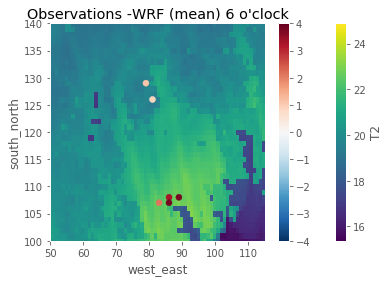

In [867]:
# map mean differences with wrf
rur = np.where(selected_locations[:,0] > 125)[0]
urb = np.where(selected_locations[:,0] <= 108)[0]

hour = 6
col = (obs_temp[obs_temp.indexes['time'].hour == hour] -wrf_temp[wrf_temp.indexes['time'].hour ==hour]).mean(dim = 'time')
(t2-273.15).plot()
plt.xlim([50,115])
plt.ylim([100,140])
plt.scatter( selected_locations[:,1][urb],selected_locations[:,0][urb], c = col[urb], cmap = cm.RdBu_r, vmin = -4, vmax = 4)
plt.scatter( selected_locations[:,1][rur],selected_locations[:,0][rur], c = col[rur], cmap = cm.RdBu_r, vmin = -4, vmax = 4)

plt.colorbar()
plt.title('Observations -WRF (mean) %s o\'clock'%hour)

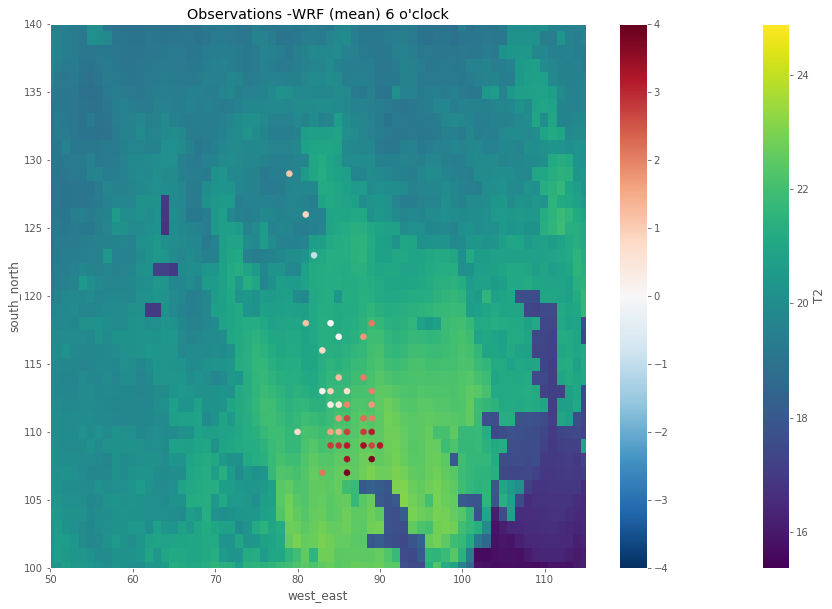

In [746]:
# map mean differences with wrf
hour = 6
col = (obs_temp[obs_temp.indexes['time'].hour == hour] -wrf_temp[wrf_temp.indexes['time'].hour ==hour]).mean(dim = 'time')
(t2-273.15).plot(figsize = [15,10])
plt.xlim([50,115])
plt.ylim([100,140])
plt.scatter( selected_locations[:,1],selected_locations[:,0], c = col, cmap = cm.RdBu_r, vmin = -4, vmax = 4)
plt.colorbar()
plt.title('Observations -WRF (mean) %s o\'clock'%hour)

In [875]:
# check out landcover 
ncfile = Dataset('/Users/ascott47/mountpoint/d03/wrfout_d01_2016-06-10_15:00:00') # 10am UTC is 6am local
lc = getvar(ncfile, "LU_INDEX")

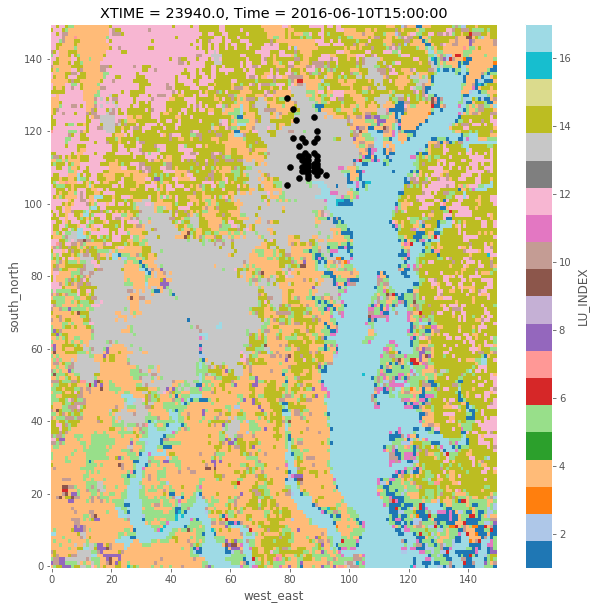

In [876]:
# modis landcover categories
lc.plot(figsize = [10,10], cmap  = cm.tab20)
plt.scatter( selected_locations[:,1],
            selected_locations[:,0], 
            c = 'k', cmap = cm.RdBu_r, vmin = -4, vmax = 4)


In [1013]:
# 'HFX_FORCE'
# check out landcover 
ncfile = Dataset('/Users/ascott47/mountpoint/d03/wrfout_d01_2016-06-10_10:00:00') # 10am UTC is 6am local
sh = getvar(ncfile, "GRDFLX")

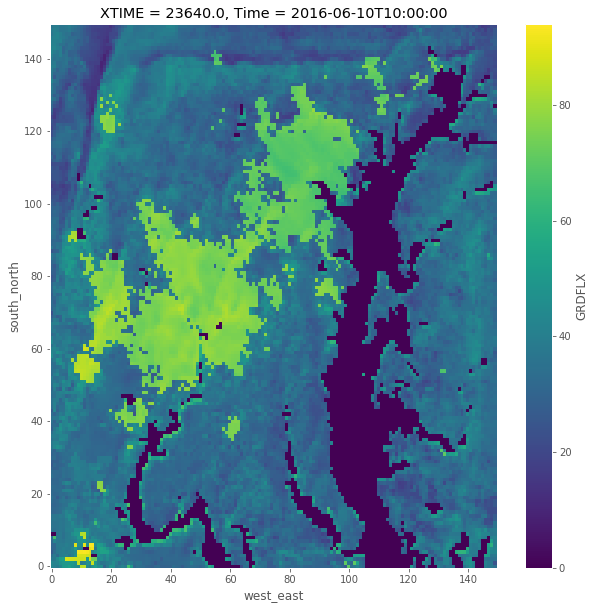

In [1014]:
sh.plot(figsize = [10,10])
# plt.scatter( selected_locations[:,1],
#             selected_locations[:,0], 
#             c = 'k', cmap = cm.RdBu_r, vmin = -4, vmax = 4)

In [6]:
# 'HFX_FORCE'
# check out landcover 
ncfile = Dataset('/Users/ascott47/mountpoint/d03/wrfout_d01_2016-06-10_18:00:00') # 10am UTC is 6am local
sh = getvar(ncfile, "GRDFLX")
sh.plot(figsize = [10,10])

IOError: No such file or directory

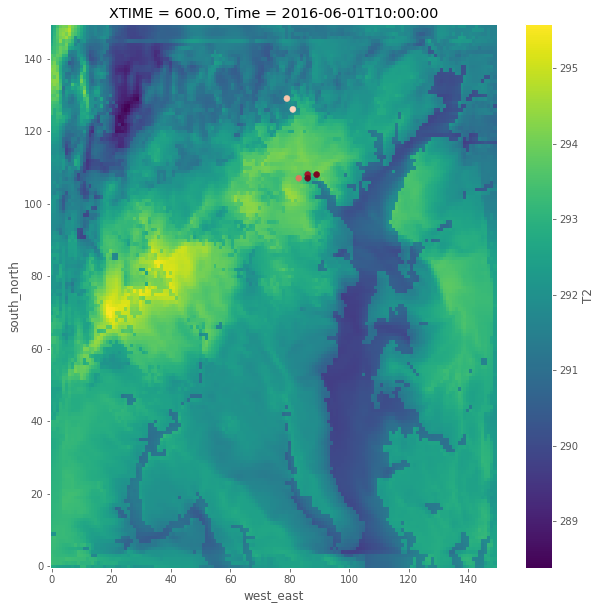

In [894]:
ncfile = Dataset('/Users/ascott47/mountpoint/d03/wrfout_d01_2016-06-01_10:00:00') # 10am UTC is 6am local
t2 = getvar(ncfile, "T2")
t2.plot(figsize = [10,10])
plt.scatter( selected_locations[:,1][urb],selected_locations[:,0][urb], c = col[urb], cmap = cm.RdBu_r, vmin = -4, vmax = 4)
plt.scatter( selected_locations[:,1][rur],selected_locations[:,0][rur], c = col[rur], cmap = cm.RdBu_r, vmin = -4, vmax = 4)


(100, 140)

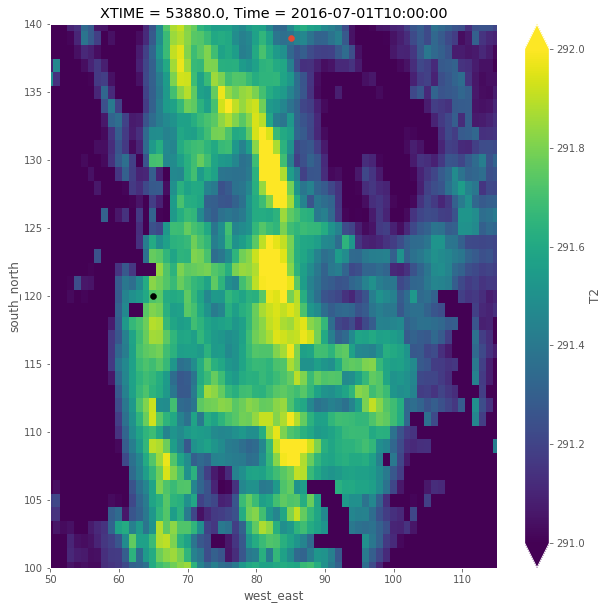

In [1000]:
ncfile = Dataset('/Users/ascott47/mountpoint/d03/wrfout_d01_2016-07-01_10:00:00') # 10am UTC is 6am local
t2 = getvar(ncfile, "T2")
t2.plot(figsize = [10,10], vmin = 291, vmax = 292)#, cmap = cm.gist_ncar_r)
plt.scatter(85,139)
plt.scatter(65, 120, color = 'k')
plt.xlim([50,115])
plt.ylim([100,140])
#rural = 

In [940]:
ncfile = Dataset('/Users/ascott47/mountpoint/d03/wrfout_d01_2016-07-01_04:00:00') # 10am UTC is 6am local
t = getvar(ncfile, "T2")

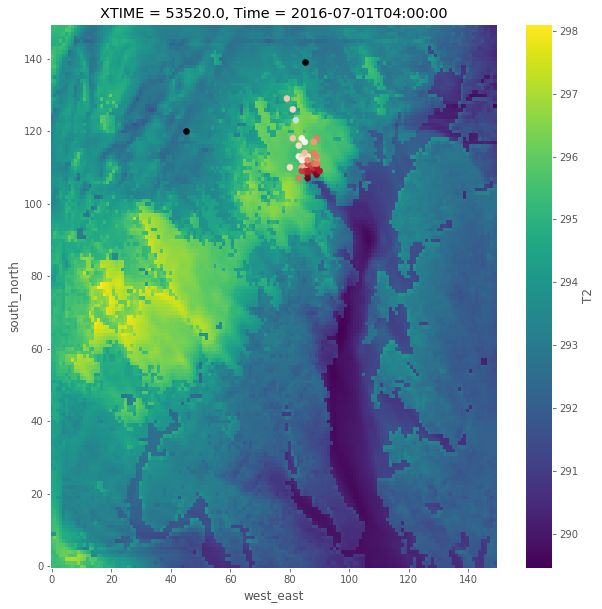

In [947]:
t.plot(figsize = [10,10])
plt.scatter( selected_locations[:,1],selected_locations[:,0], c = col, cmap = cm.RdBu_r, vmin = -4, vmax = 4)
plt.scatter(85,139, color = 'k')
plt.scatter(45, 120, color = 'k')

In [949]:
# import new rural points
# read in data
# 85,139
# 45, 120
files = list(np.sort(glob.glob('/Users/ascott47/mountpoint/d03/wrfout_*')))
#temps = np.ones([len(files), len(unique_locations), len(unique_locations)])
temps = np.ones([len(files),1])
times = []
i = 0
toc = time.time()
for file in files: 
    ncfile = nc(file, 'r')
    temps[i]  = ncfile.variables['T2'][:,85, 139]
    times.append(file[-19:])
    ncfile.close()
    i = i+1
print time.time() -toc

815.915488005


In [950]:
time_index = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S') 
time_index = time_index- pd.Timedelta('04:00:00')

rur_point = xr.DataArray(temps-273.15, coords = [time_index], 
                        dims = ['time', 'loc'])

ValueError: coords is not dict-like, but it has 1 items, which does not match the 2 dimensions of the data

In [952]:
temps.shape

(2353, 1)

In [868]:
np.diag(lc[ selected_locations[:,0], selected_locations[:,1]])[rur]

array([ 4.,  4.], dtype=float32)

In [861]:
np.diag(lc[ selected_locations[:,0],selected_locations[:,1]])[urb]

array([ 13.,  13.,  13.,  13.,  13.,  13.], dtype=float32)

In [ ]:
# 1km runs 
# /scratch/groups/bzaitch1/shared/out/WRF/Baltimore/d03/
#sshfs ascott47@jhu.edu@gateway2.marcc.jhu.edu:/scratch/groups/bzaitch1/shared/out/WRF/Baltimore/ mountpoint/
import time
files = list(np.sort(glob.glob('/Users/ascott47/mountpoint/d03/wrfout_*')))
urban_temps = np.ones(len(files))
rural_temps = np.ones(len(files))

times = []
i = 0
toc = time.time()
for file in files: 
    ncfile = nc(file, 'r')
    urban_temps[i] = ncfile.variables['T2'][:,urban_location[1],urban_location[0]]
    rural_temps[i] = ncfile.variables['T2'][:,rural_location[1],rural_location[0]]

    times.append(file[-19:])
    ncfile.close()
    i = i+1
print time.time() -toc

In [831]:
temp = pd.DataFrame([], index = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S') )
temp['urban_wrf'] = urban_temps -273.15
temp['rural_wrf'] = rural_temps -273.15
temp['deltat_wrf'] = temp['urban_wrf'] - temp['rural_wrf']

temp.index =temp.index - pd.Timedelta('04:00:00')

temp['urban_obs'] = tempDF[urban]
temp['rural_obs'] = tempDF[rural]
temp['deltat_obs'] = temp['urban_obs'] - temp['rural_obs']

#temp.to_csv('wrfanalysis.csv')
temp.head()

urban_wrf  rural_wrf  deltat_wrf  urban_obs  rural_obs  \
2016-05-24 20:00:00  23.429712  23.670251   -0.240540        NaN        NaN   
2016-05-24 21:00:00  21.621851  21.220148    0.401703        NaN        NaN   
2016-05-24 22:00:00  20.511316  20.694696   -0.183380        NaN        NaN   
2016-05-24 23:00:00  19.092126  19.136926   -0.044800        NaN        NaN   
2016-05-25 00:00:00  18.117487  17.843256    0.274231        NaN        NaN   

                     deltat_obs  
2016-05-24 20:00:00         NaN  
2016-05-24 21:00:00         NaN  
2016-05-24 22:00:00         NaN  
2016-05-24 23:00:00         NaN  
2016-05-25 00:00:00         NaN

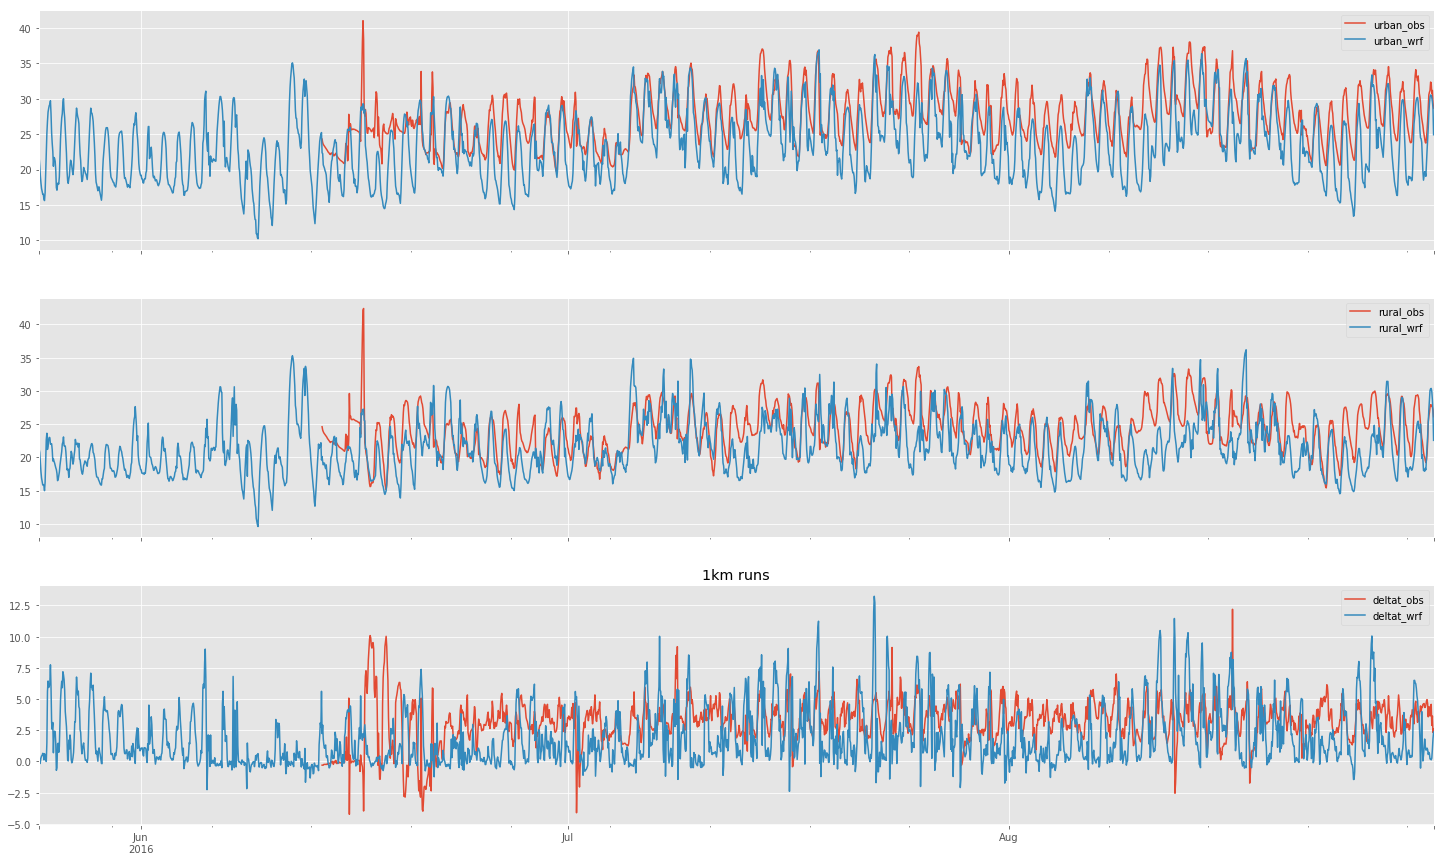

In [98]:
# plot urban and rural temperature time series together, as well as DT
fig,ax = plt.subplots(3,1, sharex=True, figsize = [25,15])
temp[['urban_obs', 'urban_wrf']].plot(ax = ax[0])
temp[['rural_obs', 'rural_wrf']].plot(ax = ax[1])
temp[['deltat_obs', 'deltat_wrf']].plot(ax = ax[2])

plt.title('1km runs')

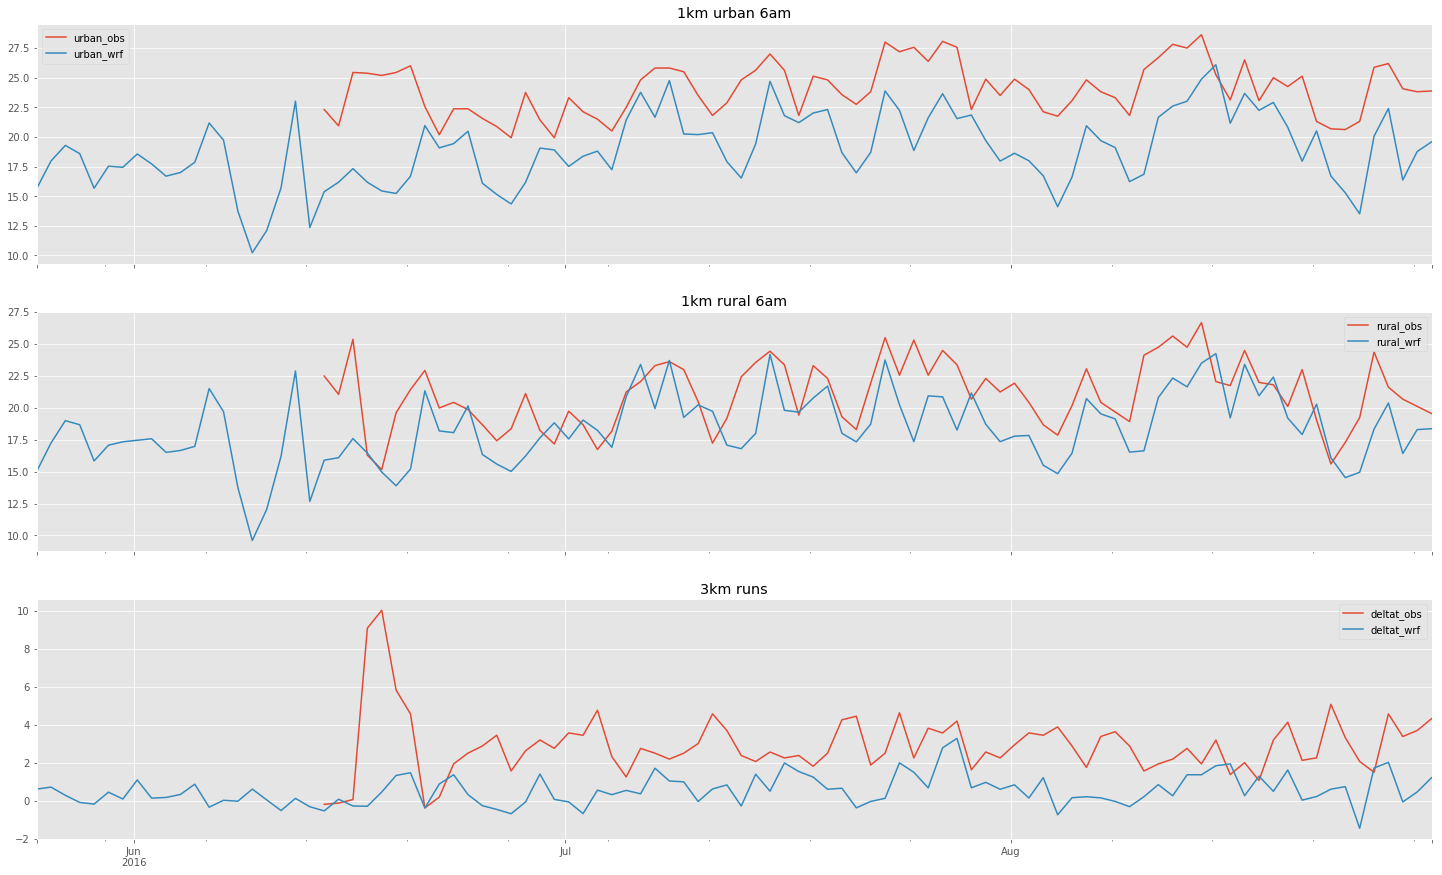

In [107]:
# plot urban and rural temperature time series together, as well as DT
fig,ax = plt.subplots(3,1, sharex=True, figsize = [25,15])
temp[['urban_obs', 'urban_wrf']][temp.index.hour==6].plot(ax = ax[0], title = '1km urban 6am')
temp[['rural_obs', 'rural_wrf']][temp.index.hour==6].plot(ax = ax[1], title = '1km rural 6am')
temp[['deltat_obs', 'deltat_wrf']][temp.index.hour==6].plot(ax = ax[2],  title = '1km DT 6am')

plt.title('3km runs')

(18, 35)

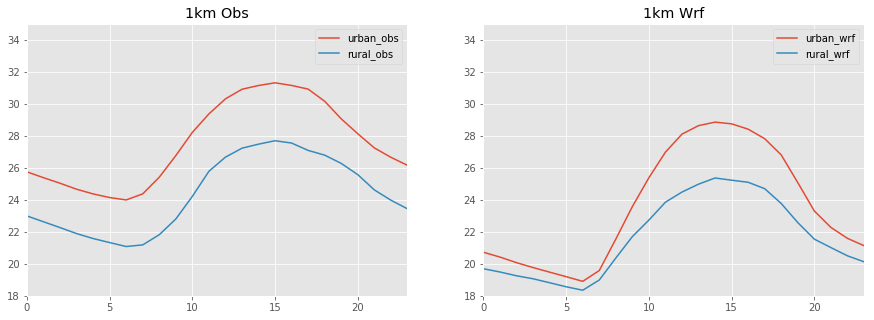

In [834]:
fig,ax = plt.subplots(1,2, sharex=True, figsize = [15,5])

temp[['urban_obs', 'rural_obs']].groupby(temp.index.hour).mean().plot(ax = ax[0], title = '1km Obs')# yerr = temp[['urban_obs', 'rural_obs']].groupby(temp.index.hour).std())
ax[0].set_ylim([18,35])
temp[['urban_wrf', 'rural_wrf']].groupby(temp.index.hour).mean().plot(ax = ax[1], title = '1km Wrf')
ax[1].set_ylim([18,35])


In [833]:
ax[0].set_ylim([1,2])

(1, 2)

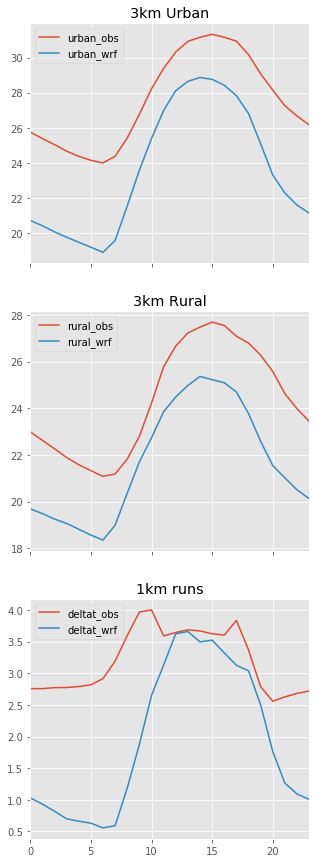

In [106]:
# plot urban and rural diurnal temps together, as well as DT
fig,ax = plt.subplots(3,1, sharex=True, figsize = [5,15])
temp[['urban_obs', 'urban_wrf']].groupby(temp.index.hour).mean().plot(ax = ax[0], title = '3km Urban')
temp[['rural_obs', 'rural_wrf']].groupby(temp.index.hour).mean().plot(ax = ax[1], title = '3km Rural')
temp[['deltat_obs', 'deltat_wrf']].groupby(temp.index.hour).mean().plot(ax = ax[2], title = '3km DT')
plt.title('1km runs')

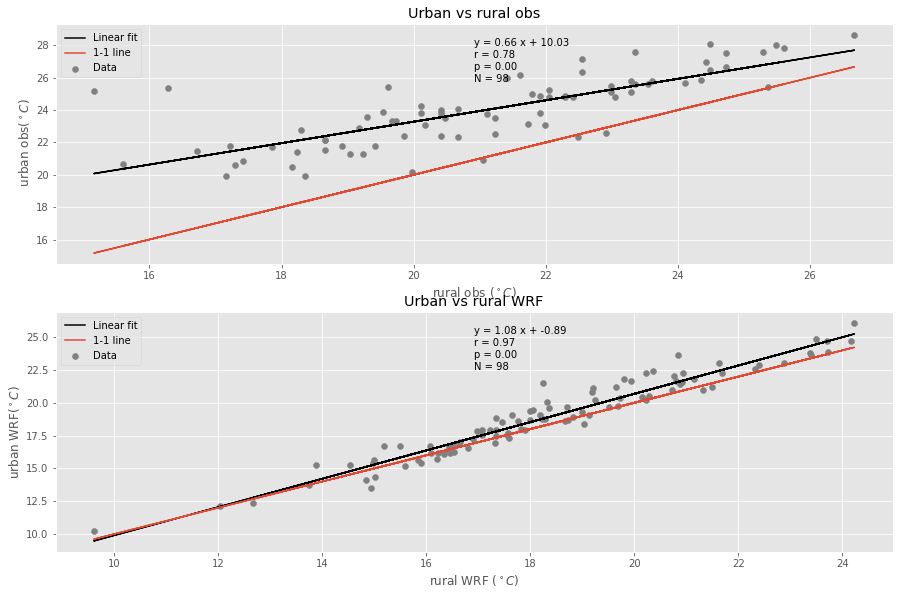

In [101]:
#urban versus rural temp for obs and wrf
fig,ax = plt.subplots(2,1, sharex=True, figsize = [15,15])
plt.subplot(311)
easy_scatter(temp['rural_obs'][temp.index.hour==6], temp['urban_obs'][temp.index.hour==6], 'Urban vs rural obs', 'rural obs ($^\circ C$)',' urban obs($^\circ C$)' )
plt.plot(temp['rural_obs'][temp.index.hour==6], temp['rural_obs'][temp.index.hour==6])
plt.legend([ 'Linear fit', '1-1 line', 'Data',])

plt.subplot(312)
easy_scatter(temp['rural_wrf'][temp.index.hour==6], temp['urban_wrf'][temp.index.hour==6], 'Urban vs rural WRF', 'rural WRF ($^\circ C$)','urban WRF($^\circ C$)' )
plt.plot(temp['rural_wrf'][temp.index.hour==6], temp['rural_wrf'][temp.index.hour==6])
plt.legend([ 'Linear fit', '1-1 line', 'Data',])

In [110]:
meta

sensornumber                            meta:instanceID  \
sensornumber                                                            
82.0                  82.0  uuid:d94a2b65-fda8-44e3-9d22-9e38b9248f65   
139.0                139.0  uuid:29523146-79ce-47b8-bcf6-3b8ee53fa055   
130.0                130.0  uuid:5d85b5bc-0a25-4471-80f0-b3d5c7314b41   
32.0                  32.0  uuid:737e87ae-8b1f-4b1b-a3f0-56bbef5b0618   
10.0                  10.0  uuid:259a9063-407e-4c12-bc9a-963aa4af5c69   
129.0                129.0  uuid:d971aa00-5503-4fbf-81f7-98cbae38cb08   
105.0                105.0  uuid:82b6aea0-f87f-42b6-b544-599754e4e71a   
80.0                  80.0  uuid:c37a993b-3670-4059-8ca2-9a93d09d6d43   
34.0                  34.0  uuid:1cd589ce-3fe7-4001-97ff-df53b2f03e41   
71.0                  71.0  uuid:8b860b8b-aed0-4754-ac6e-16ffc10c559d   
35.0                  35.0  uuid:6bc0ce81-52f5-4f33-95f3-bd794edac977   
106.0                106.0  uuid:ba737dfb-22bd-4d89-857c-f9cb372d6fcc   
91.0                  91.0  uuid:6611c84e-d0de-443e-a1ae-60eca4ddba26   
131.0                131.0  uuid:1afd5796-7b96-4278-ab54-c5fe4677b3ae   
19.0                  19.0  uuid:630ebc51-e796-42f6-9797-cc50c4c7ad7a   
42.0                  42.0  uuid:99cf2d42-0327-43b7-9939-46cf92de5658   
27.0                  27.0  uuid:2caf58a4-ca8e-47fa-a400-05c32f8bb808   
5.0                    5.0  uuid:2435cc97-630c-43a0-af3c-d1e6f0a7b0ec   
88.0                  88.0  uuid:cb6b5eaa-5866-417c-9b06-cd2b7440d024   
72.0                  72.0  uuid:d6ef7e28-bcbb-4880-bc5a-00f5a36948b6   
70.0                  70.0  uuid:2faefd36-69d4-423f-ba43-8627fece9cc7   
40.0                  40.0  uuid:c9fdfbd1-05ab-42ce-b673-74a8172c7fe7   
132.0                132.0  uuid:59ea1446-3139-4295-ab86-78b3522610d9   
48.0                  48.0  uuid:71301d81-06ae-4e60-94ca-6d53ae81feef   
143.0                143.0  uuid:5ae1d90d-ac63-48f8-830a-ede99322a2e8   
120.0                120.0  uuid:6ec80e85-cff6-4990-8508-70d9b1a0dac3   
33.0                  33.0  uuid:f0081d31-3ed1-43f7-906e-349d29379a1f   
54.0                  54.0  uuid:7c087e1b-ee5e-41cf-b289-2028f8043293   
102.0                102.0  uuid:0953ccfa-397b-4e26-840a-533d7b9720f5   
124.0                124.0  uuid:7e7e29e7-d19f-4f4c-aa39-d59ab5671747   
...                    ...                                        ...   
41.0                  41.0  uuid:62b4f390-f4a7-40e2-9246-b520c5653b8d   
103.0                103.0  uuid:eb0315e6-2e43-499a-b67e-7ef746b614ae   
123.0                123.0  uuid:d5914412-2fd0-4b09-b520-6b7a9365995b   
50.0                  50.0  uuid:a8a2878b-b55f-4968-8295-5e2fde88470f   
108.0                108.0  uuid:1d796b97-3c4b-4c97-b176-f61e68b96654   
12.0                  12.0  uuid:54f52cfd-6460-4b8f-9bf6-f9ff2673c29c   
100.0                100.0  uuid:a3efe8a6-7c1b-4de8-9272-a9e50a614429   
137.0                137.0  uuid:9b5bc1b1-05fe-4ece-9aee-8a292e98041e   
77.0                  77.0  uuid:7d86cdec-5f90-439c-ad54-411d56438497   
136.0                136.0  uuid:8c9deedc-5e6b-4a64-ab65-f71356e8ec07   
22.0                  22.0  uuid:473b4443-d029-4fc4-8bb3-20b03f919a18   
90.0                  90.0  uuid:5b9bd37c-8b99-4293-aa48-4b746442e4b3   
31.0                  31.0  uuid:e5d9650c-9e3b-4679-bc07-4e5ea0a3e781   
92.0                  92.0  uuid:9e4902c8-5128-4a26-856c-53da4fea8f2b   
2.0                    2.0  uuid:b01f6b7b-2646-4911-a9f3-1821b2f3143e   
110.0                110.0  uuid:08eaa940-74fe-41ba-a45a-2920328d7f4b   
11.0                  11.0  uuid:46f2b049-2ed4-4e11-8078-5287bfb70784   
141.0                141.0  uuid:fff92bfe-7cf3-4363-9a6c-0d0dc079c160   
126.0                126.0  uuid:af4d285d-a49c-45c4-9444-093d5e9a34bd   
78.0                  78.0  uuid:afd6fbd6-1afa-46ad-a8f0-e0ff9ab7b1a1   
62.0                  62.0  uuid:ae19e4cd-b98e-41a9-9510-e21137a2606a   
24.0                  24.0  uuid:aa888c63-388e-4886-9c07-912e265e0fd6   

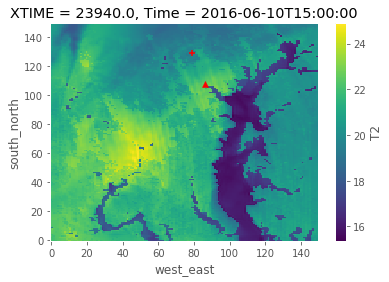

In [280]:
# import the dataset and query a point
import scipy.spatial
from netCDF4 import Dataset
from wrf import getvar
ncfile = Dataset('/Users/ascott47/mountpoint/d03/wrfout_d01_2016-06-10_15:00:00') # 10am UTC is 6am local

t2 = getvar(ncfile, "T2")
df = t2.to_dataframe()

tree = scipy.spatial.KDTree(df[['XLONG', 'XLAT']].values, leafsize = 100)

# urban 
results = tree.query(analysis_points.loc['urban'].values, k = 5, distance_upper_bound=1) # lookup closest points; returns first row as distance and second row as index
urban_location = df.iloc[results[1][0]].name # get the 'name', or coordinate location, of the points

# rural
results = tree.query(analysis_points.loc['rural'].values, k = 5, distance_upper_bound=1) # lookup closest points; returns first row as distance and second row as index
rural_location = df.iloc[results[1][0]].name # get the 'name', or coordinate location, of the points

fig  = (t2-273.15).plot()
ax = fig.get_axes()
ax.scatter(urban_location[1], urban_location[0],  marker = '^', color = 'r')
ax.scatter(rural_location[1],rural_location[0], marker = '+', color = 'r')

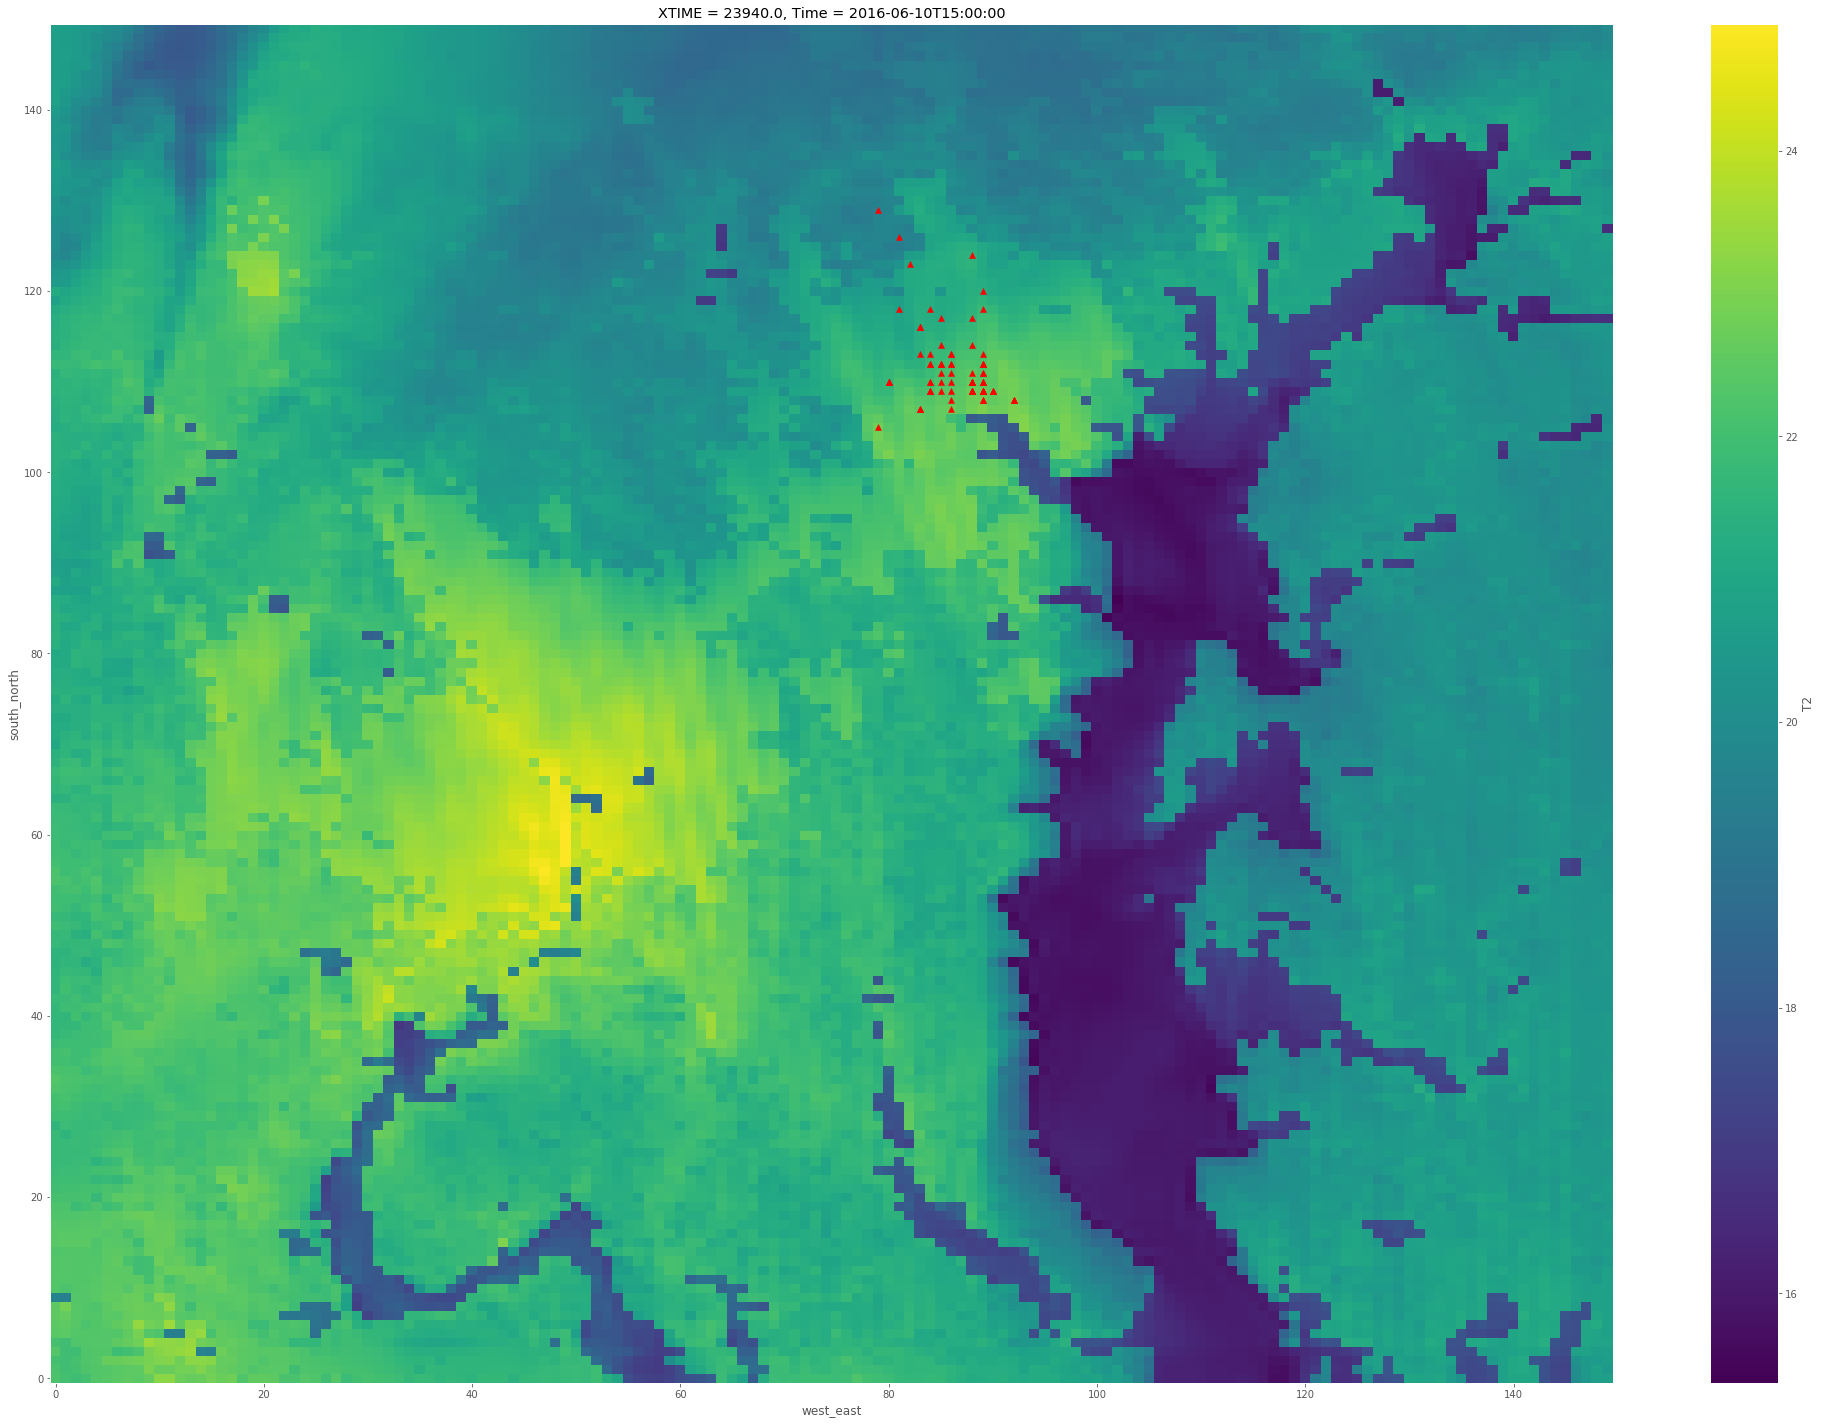

In [414]:
# snap points to grid and get coordinate locations of the points
fig  = (t2-273.15).plot(figsize = [35,25])
ax = fig.get_axes()

analysis_points = meta[['location:Longitude', 'location:Latitude']].dropna()
unique_locations = []
for point in analysis_points.values: 
    results = tree.query(point, k = 5, distance_upper_bound=1) # lookup closest points; returns first row as distance and second row as index
    location = df.iloc[results[1][0]].name # get the 'name', or coordinate location, of the points
    if location not in unique_locations: 
        unique_locations.append(location)
    ax.scatter(location[1], location[0],  marker = '^', color = 'r')


In [417]:
len(unique_locations)

43

In [405]:
#dummy_x = np.linspace(-76.5, -76.7,100)
grid_x = t2.coords['XLONG'].values#np.linspace(-77.62, -75.869, 100)
grid_y = t2.coords['XLAT'].values#np.linspace(39.3, 39.27, 100)
#grid_x, grid_y = np.meshgrid(dummy_x, dummy_y)

points_x = meta['location:Longitude'].dropna().values #np.linspace(1, 100, 86)
points_y = meta['location:Latitude'].dropna().values #np.linspace(1, 100, 86)

temp = tempDF[meta['location:Longitude'].dropna().index].values.T

gridded_temp = scipy.interpolate.griddata(np.vstack([points_x, points_y]).T, 
                                  temp, 
                                  (grid_x, grid_y), 
                                  method = 'linear'
                                  )
plt.figure(figsize=[15,5])
for loc in unique_locations: 
    plt.plot(tempDF.index, gridded_temp[loc])
# plt.figure(figsize=[15,15])
# plt.imshow(grid_z0.T,
#            #extent=(0,1,0,1), 
#            origin='lower', cmap = 'hot')
# plt.colorbar()

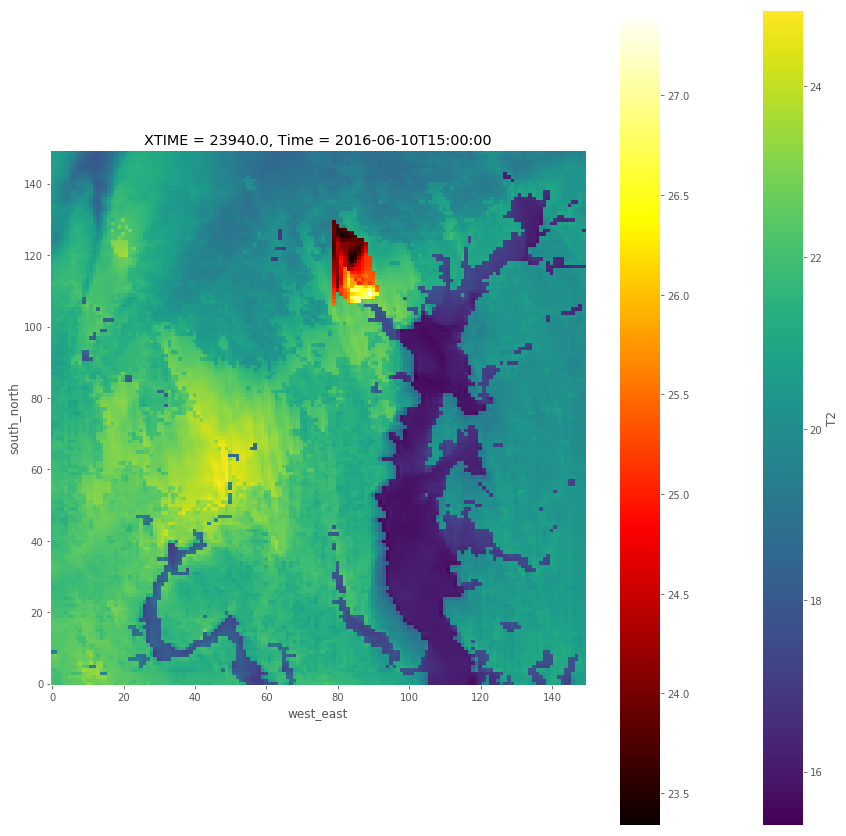

In [826]:
plt.figure(figsize=[15,15])
(t2-273.15).plot()
plt.imshow(np.nanmean(gridded_temp, axis=2), origin='lower', cmap = 'hot', zorder =1)
plt.colorbar()

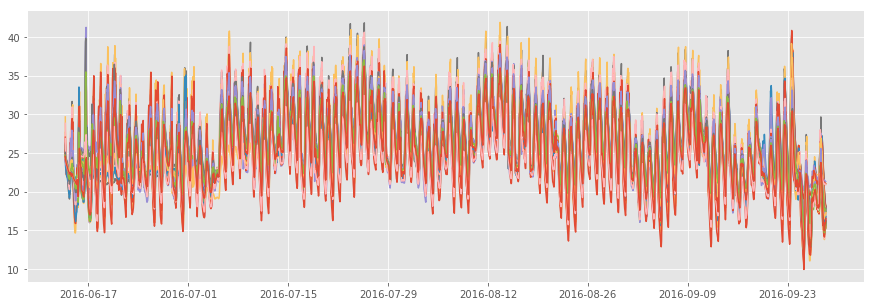

In [423]:
plt.figure(figsize=[15,5])
for loc in unique_locations: 
    plt.plot(tempDF.index, gridded_temp[loc])

In [2]:
# 3KM RUNS 
# sshfs ascott47@jhu.edu@gateway2.marcc.jhu.edu:/scratch/groups/bzaitch1/shared/out/WRF/Baltimore/d02/ mountpoint/


In [3]:
from netCDF4 import Dataset as nc

In [4]:
filepath = '/Users/ascott47/mountpoint/' #
files = glob.glob(filepath+ 'wrfout*')
from netCDF4 import Dataset as nc
f = nc('/Users/ascott47/mountpoint/wrfout_d01_2016-06-10_15:00:00')
#print f
for v in f.variables: 
    #print f.variables[v]
    try: 
        print(f.variables[v].name, f.variables[v].description)
    except AttributeError: 
        ''

(u'XLAT', u'LATITUDE, SOUTH IS NEGATIVE')
(u'XLONG', u'LONGITUDE, WEST IS NEGATIVE')
(u'LU_INDEX', u'LAND USE CATEGORY')
(u'ZNU', u'eta values on half (mass) levels')
(u'ZNW', u'eta values on full (w) levels')
(u'ZS', u'DEPTHS OF CENTERS OF SOIL LAYERS')
(u'DZS', u'THICKNESSES OF SOIL LAYERS')
(u'VAR_SSO', u'variance of subgrid-scale orography')
(u'U', u'x-wind component')
(u'V', u'y-wind component')
(u'W', u'z-wind component')
(u'PH', u'perturbation geopotential')
(u'PHB', u'base-state geopotential')
(u'T', u'perturbation potential temperature (theta-t0)')
(u'HFX_FORCE', u'SCM ideal surface sensible heat flux')
(u'LH_FORCE', u'SCM ideal surface latent heat flux')
(u'TSK_FORCE', u'SCM ideal surface skin temperature')
(u'HFX_FORCE_TEND', u'SCM ideal surface sensible heat flux tendency')
(u'LH_FORCE_TEND', u'SCM ideal surface latent heat flux tendency')
(u'TSK_FORCE_TEND', u'SCM ideal surface skin temperature tendency')
(u'MU', u'perturbation dry air mass in column')
(u'MUB', u'base stat

In [4]:
# read in temp data 
filepath = '../cityheat/Bmore/2016/'

meta = pd.DataFrame(pd.read_csv(filepath + 'data/CleanedMeta2016.csv', sep = ','))
meta = meta.set_index('sensornumber', drop = False)
meta = meta.set_index(meta.index.astype('float64'), drop = False)
#mean_temp = pd.read_csv('meantemp.csv', header=-1).rename(columns = {0: 'SensorNumber', 1:'MeanTemp'}).set_index('SensorNumber')
tempDF = pd.read_csv(filepath + 'data/CleanedTemp2016.csv', parse_dates = [0]).set_index('Date').resample('H', how = 'first')#.first()
tempDF.columns = tempDF.columns.astype('int')

rhDF = pd.read_csv(filepath + 'data/CleanedRH2016.csv', parse_dates = [0]).set_index('Date').resample('H', how = 'first')
rhDF.columns = rhDF.columns.astype('int')

urban = 97 # science center
rural = 68 # darryn's house

analysis_points = meta.loc[[urban,rural]][['location:Longitude', 'location:Latitude']]
analysis_points = meta.loc[[urban,rural]][['location:Longitude', 'location:Latitude']]
analysis_points.index = ['urban', 'rural']
analysis_points

/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()


location:Longitude  location:Latitude
urban          -76.611088          39.281527
rural          -76.706294          39.479408

In [6]:
import scipy.spatial
from netCDF4 import Dataset
from wrf import getvar
ncfile = Dataset('/Users/ascott47/mountpoint/wrfout_d01_2016-06-10_15:00:00')

t2 = getvar(ncfile, "T2")
df = t2.to_dataframe()

tree = scipy.spatial.KDTree(df[['XLONG', 'XLAT']].values, leafsize = 100)

# urban 
results = tree.query(analysis_points.loc['urban'].values, k = 5, distance_upper_bound=1) # lookup closest points; returns first row as distance and second row as index
urban_location = df.iloc[results[1][0]].name # get the 'name', or coordinate location, of the points

# rural
results = tree.query(analysis_points.loc['rural'].values, k = 5, distance_upper_bound=1) # lookup closest points; returns first row as distance and second row as index
rural_location = df.iloc[results[1][0]].name # get the 'name', or coordinate location, of the points

In [7]:
import time
files = list(np.sort(glob.glob('/Users/ascott47/mountpoint/wrfout_*')))
urban_temps = np.ones(len(files))
rural_temps = np.ones(len(files))

times = []
i = 0
toc = time.time()
for file in files: 
    ncfile = nc(file, 'r')
    urban_temps[i] = ncfile.variables['T2'][:,urban_location[1],urban_location[0]]
    rural_temps[i] = ncfile.variables['T2'][:,rural_location[1],rural_location[0]]

    times.append(file[-19:])
    ncfile.close()
    i = i+1
print time.time() -toc

744.455054045


/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


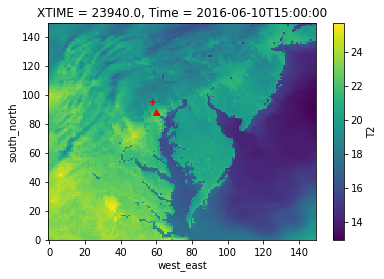

In [8]:
fig  = (t2-273.15).plot()
ax = fig.get_axes()
ax.scatter(urban_location[1], urban_location[0],  marker = '^', color = 'r')
ax.scatter(rural_location[1],rural_location[0], marker = '+', color = 'r')

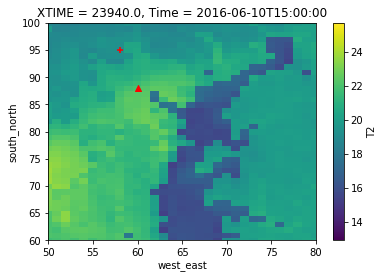

In [9]:
fig  = (t2-273.15).plot()
ax = fig.get_axes()
ax.set_xlim([50,80])
ax.set_ylim([60,100])
ax.scatter(urban_location[1], urban_location[0],  marker = '^', color = 'r')
ax.scatter(rural_location[1],rural_location[0], marker = '+', color = 'r')

In [10]:
temp = pd.DataFrame([], index = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S'))
temp['urban_wrf'] = urban_temps -273.15
temp['rural_wrf'] = rural_temps -273.15
temp['urban_obs'] = tempDF[urban]
temp['rural_obs'] = tempDF[rural]

temp['deltat_wrf'] = temp['urban_wrf'] - temp['rural_wrf']
temp['deltat_obs'] = temp['urban_obs'] - temp['rural_obs']
#temp.to_csv('wrfanalysis.csv')
temp.head()

urban_wrf  rural_wrf  urban_obs  rural_obs  deltat_wrf  \
2016-05-25 00:00:00  20.694879  20.124200        NaN        NaN    0.570679   
2016-05-25 01:00:00  19.306909  18.786371        NaN        NaN    0.520538   
2016-05-25 02:00:00  18.349512  17.805353        NaN        NaN    0.544159   
2016-05-25 03:00:00  17.304529  17.236353        NaN        NaN    0.068176   
2016-05-25 04:00:00  16.493097  16.478448        NaN        NaN    0.014648   

                     deltat_obs  
2016-05-25 00:00:00         NaN  
2016-05-25 01:00:00         NaN  
2016-05-25 02:00:00         NaN  
2016-05-25 03:00:00         NaN  
2016-05-25 04:00:00         NaN

In [14]:
plt.style.use('ggplot')

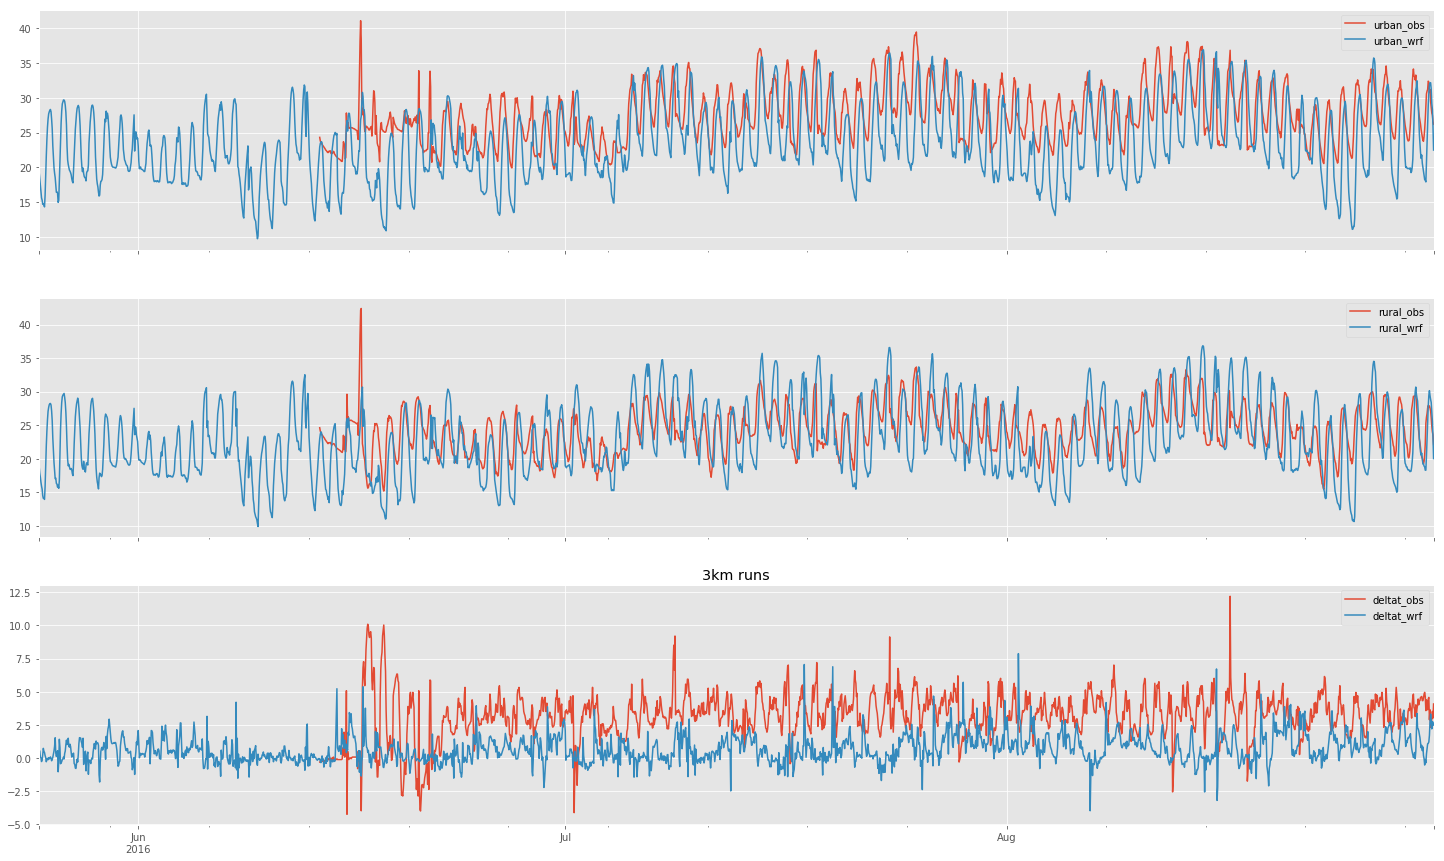

In [15]:
# plot urban and rural temperature time series together, as well as DT
fig,ax = plt.subplots(3,1, sharex=True, figsize = [25,15])
temp[['urban_obs', 'urban_wrf']].plot(ax = ax[0])
temp[['rural_obs', 'rural_wrf']].plot(ax = ax[1])
temp[['deltat_obs', 'deltat_wrf']].plot(ax = ax[2])

plt.title('3km runs')

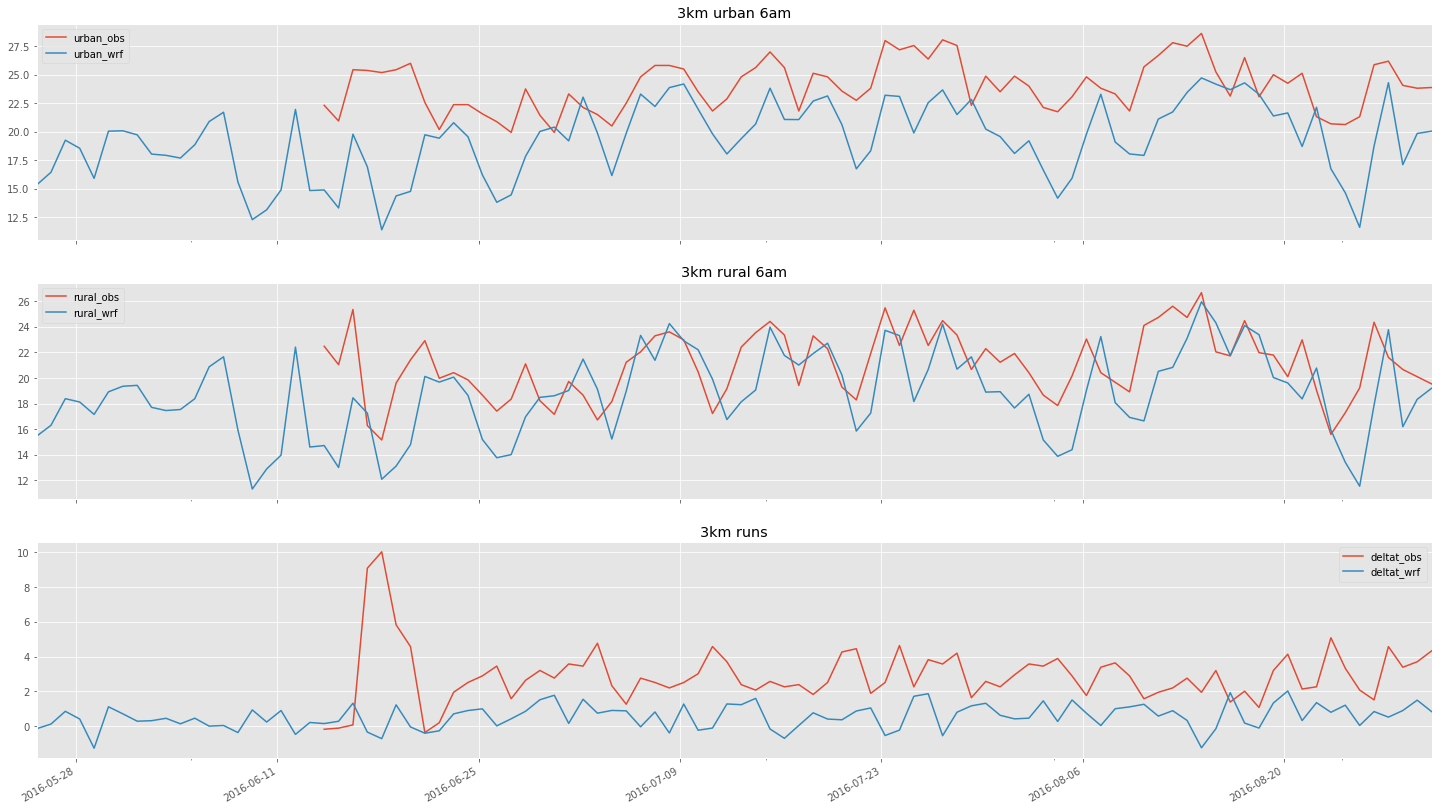

In [26]:
# plot urban and rural temperature time series together, as well as DT
fig,ax = plt.subplots(3,1, sharex=True, figsize = [25,15])
temp[['urban_obs', 'urban_wrf']][temp.index.hour==6].plot(ax = ax[0], title = '3km urban 6am')
temp[['rural_obs', 'rural_wrf']][temp.index.hour==6].plot(ax = ax[1], title = '3km rural 6am')
temp[['deltat_obs', 'deltat_wrf']][temp.index.hour==6].plot(ax = ax[2],  title = '3km DT 6am')

plt.title('3km runs')

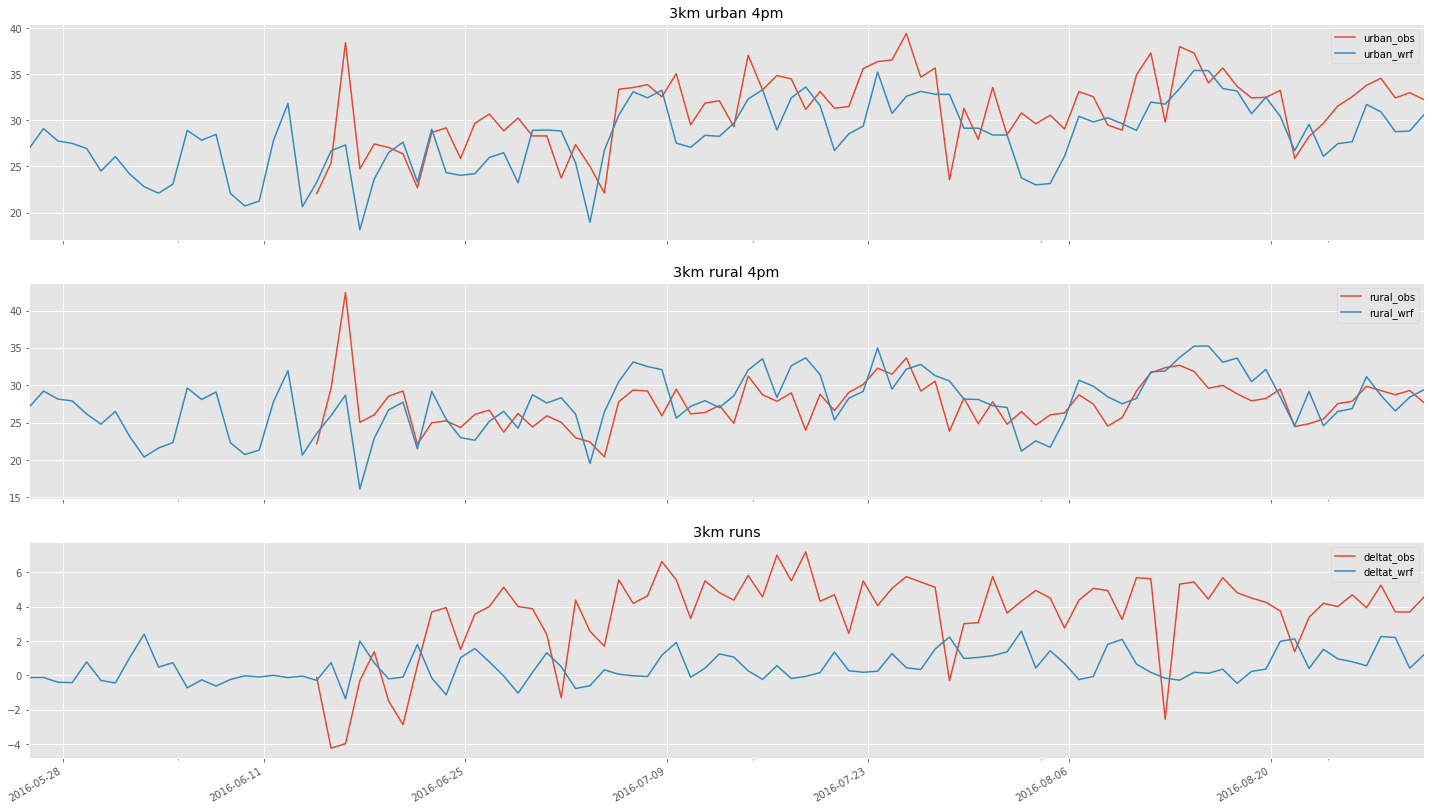

In [36]:
# plot urban and rural temperature time series together, as well as DT
fig,ax = plt.subplots(3,1, sharex=True, figsize = [25,15])
temp[['urban_obs', 'urban_wrf']][temp.index.hour==16].plot(ax = ax[0], title = '3km urban 4pm')
temp[['rural_obs', 'rural_wrf']][temp.index.hour==16].plot(ax = ax[1], title = '3km rural 4pm')
temp[['deltat_obs', 'deltat_wrf']][temp.index.hour==16].plot(ax = ax[2],  title = '3km DT 4pm')

plt.title('3km runs')

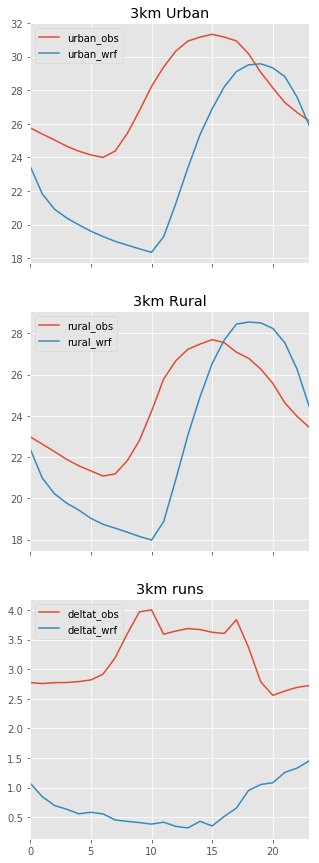

In [18]:
# plot urban and rural diurnal temps together, as well as DT
fig,ax = plt.subplots(3,1, sharex=True, figsize = [5,15])
temp[['urban_obs', 'urban_wrf']].groupby(temp.index.hour).mean().plot(ax = ax[0], title = '3km Urban')
temp[['rural_obs', 'rural_wrf']].groupby(temp.index.hour).mean().plot(ax = ax[1], title = '3km Rural')
temp[['deltat_obs', 'deltat_wrf']].groupby(temp.index.hour).mean().plot(ax = ax[2], title = '3km DT')
plt.title('3km runs')

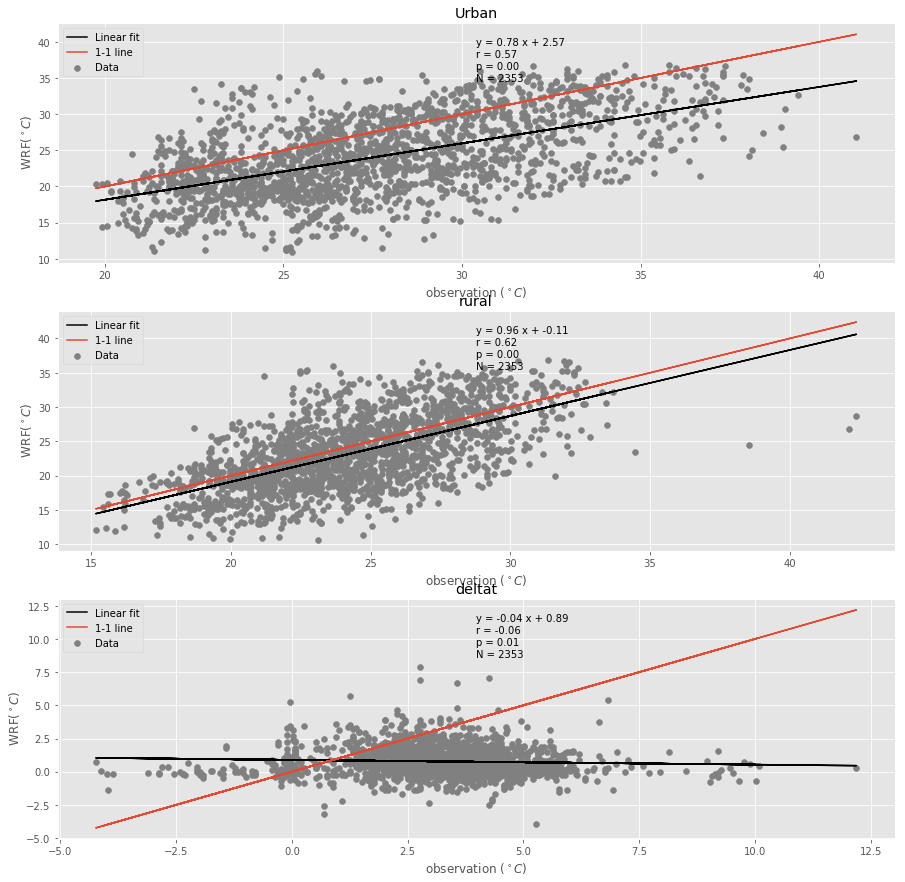

In [37]:
# Correlation plots of obs/wrf for urban temps, rural temps, and UHI
fig,ax = plt.subplots(3,1, sharex=True, figsize = [15,15])
plt.subplot(311)
easy_scatter(temp['urban_obs'], temp['urban_wrf'], 'Urban', 'observation ($^\circ C$)',' WRF($^\circ C$)' )
plt.plot(temp['urban_obs'], temp['urban_obs'])
plt.legend([ 'Linear fit', '1-1 line', 'Data',])

plt.subplot(312)
easy_scatter(temp['rural_obs'], temp['rural_wrf'], 'rural', 'observation ($^\circ C$)',' WRF($^\circ C$)' )
plt.plot(temp['rural_obs'], temp['rural_obs'])
plt.legend([ 'Linear fit', '1-1 line', 'Data',])

plt.subplot(313)
easy_scatter(temp['deltat_obs'], temp['deltat_wrf'], 'deltat', 'observation ($^\circ C$)',' WRF($^\circ C$)' )
plt.plot(temp['deltat_obs'], temp['deltat_obs'])
plt.legend([ 'Linear fit', '1-1 line', 'Data',])


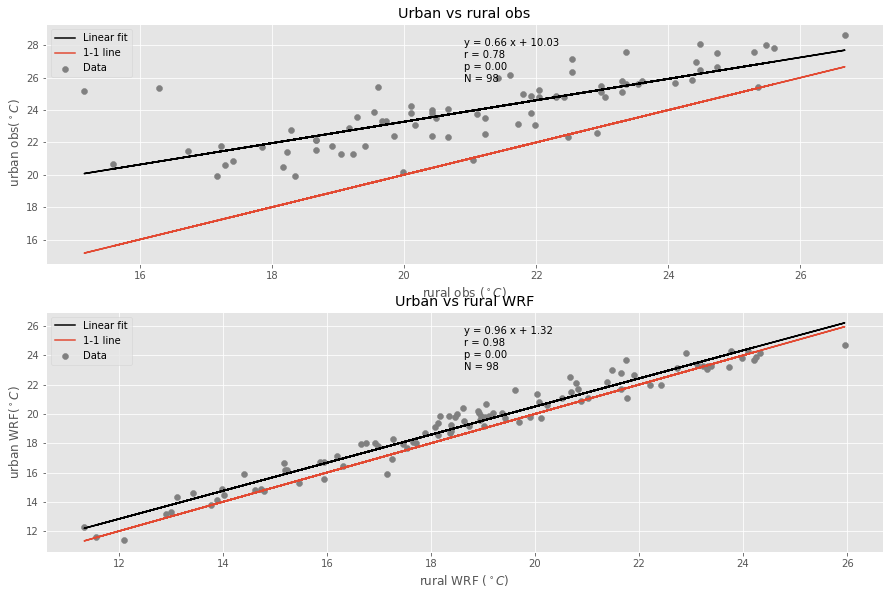

In [43]:
#urban versus rural temp for obs and wrf
fig,ax = plt.subplots(2,1, sharex=True, figsize = [15,15])
plt.subplot(311)
easy_scatter(temp['rural_obs'][temp.index.hour==6], temp['urban_obs'][temp.index.hour==6], 'Urban vs rural obs', 'rural obs ($^\circ C$)',' urban obs($^\circ C$)' )
plt.plot(temp['rural_obs'][temp.index.hour==6], temp['rural_obs'][temp.index.hour==6])
plt.legend([ 'Linear fit', '1-1 line', 'Data',])

plt.subplot(312)
easy_scatter(temp['rural_wrf'][temp.index.hour==6], temp['urban_wrf'][temp.index.hour==6], 'Urban vs rural WRF', 'rural WRF ($^\circ C$)','urban WRF($^\circ C$)' )
plt.plot(temp['rural_wrf'][temp.index.hour==6], temp['rural_wrf'][temp.index.hour==6])
plt.legend([ 'Linear fit', '1-1 line', 'Data',])

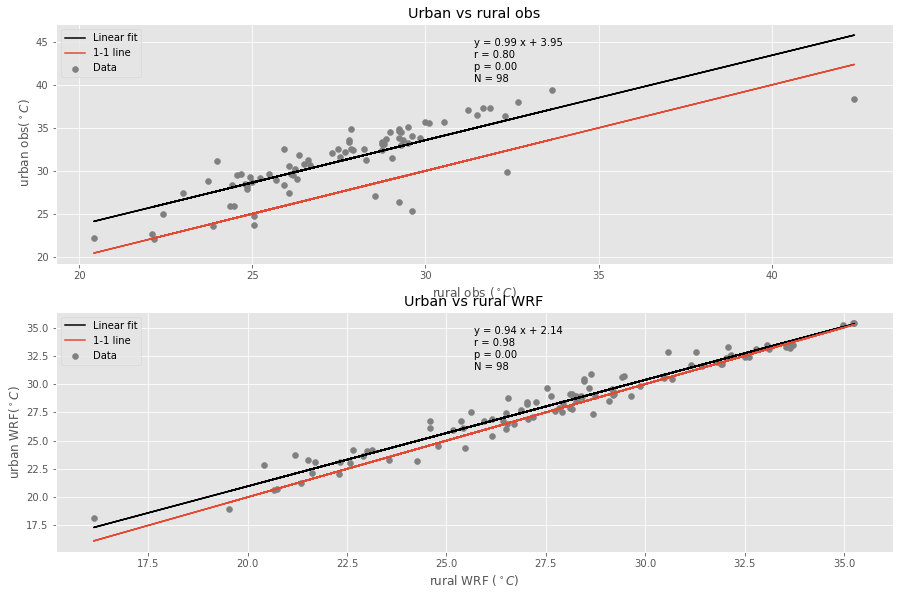

In [44]:
#urban versus rural temp for obs and wrf
fig,ax = plt.subplots(2,1, sharex=True, figsize = [15,15])
hour = 16
plt.subplot(311)
easy_scatter(temp['rural_obs'][temp.index.hour==hour], temp['urban_obs'][temp.index.hour==hour], 'Urban vs rural obs', 'rural obs ($^\circ C$)',' urban obs($^\circ C$)' )
plt.plot(temp['rural_obs'][temp.index.hour==hour], temp['rural_obs'][temp.index.hour==hour])
plt.legend([ 'Linear fit', '1-1 line', 'Data',])

plt.subplot(312)
easy_scatter(temp['rural_wrf'][temp.index.hour==hour], temp['urban_wrf'][temp.index.hour==hour], 'Urban vs rural WRF', 'rural WRF ($^\circ C$)','urban WRF($^\circ C$)' )
plt.plot(temp['rural_wrf'][temp.index.hour==hour], temp['rural_wrf'][temp.index.hour==hour])
plt.legend([ 'Linear fit', '1-1 line', 'Data',])

to do: try comparing the energy budget on 2 days, a dry day, 8/22, with a moist day, 7-18

In [15]:
# plot energy balance
import time
#files = list(np.sort(glob.glob('~/mountpoint/wrfout_*')))
files = list(np.sort(glob.glob('/Users/ascott47/mountpoint/wrfout_*')))

variables = ['T2', 'SWDNB', 'SWUPB', 'LWDNB', 'LWUPB', 'LH', 'HFX', 'GRDFLX']
urban_df = np.ones([len(files), len(variables)])
rural_df = np.ones([len(files), len(variables)])

times = []
i = 0
toc = time.time()
for file in files: 
    ncfile = Dataset(file, 'r')
    variables = ['T2', 'SWDNB', 'SWUPB', 'LWDNB', 'LWUPB', 'LH', 'HFX', 'GRDFLX']
    urban_df[i,:] = [ncfile.variables[x][:,urban_location[1],urban_location[0]] for x in variables]
    rural_df[i,:] = [ncfile.variables[x][:,rural_location[1],rural_location[0]] for x in variables]
    
    times.append(file[-19:])
    ncfile.close()
    i = i+1
print time.time() -toc

urbanDF = pd.DataFrame(urban_df, columns=variables, 
             index = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S'))
ruralDF = pd.DataFrame(rural_df, columns=variables, 
             index = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S'))

urbanDF.to_csv('urban_wrfanalysis_3km.csv')
ruralDF.to_csv('rural_wrfanalysis_3km.csv')

961.778670073


In [30]:
### read in some soil temperature data
times = []
i = 0
toc = time.time()
urban_sm = np.ones([len(files[-48:]), 1])
rural_sm = np.ones([len(files[-48:]), 1])
for file in files[-48:]: 
    ncfile = Dataset(file, 'r')
    variables = ['LWUPB']
    urban_sm[i,:] = [ncfile.variables[x][:,urban_location[1],urban_location[0]] for x in variables]
    rural_sm[i,:] = [ncfile.variables[x][:,rural_location[1],rural_location[0]] for x in variables]
    
    times.append(file[-19:])
    ncfile.close()
    i = i+1

urbansm = pd.DataFrame(urban_sm, columns=variables, 
             index = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S'))
ruralsm = pd.DataFrame(rural_sm, columns=variables, 
             index = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S'))

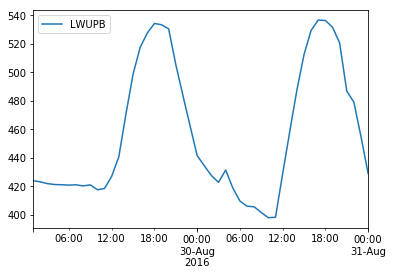

In [32]:
urbansm.plot()

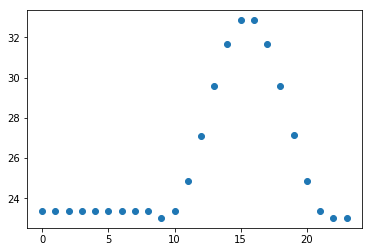

In [67]:
T_s = 28 + 5*np.sin(-.5*(np.arange(0,24))-np.pi-.1)
T_s[0:9] = T_s[10]
T_s[23] = T_s[22]
plt.plot(T_s, 'o')

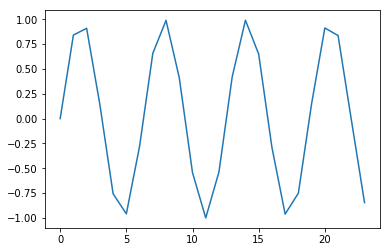

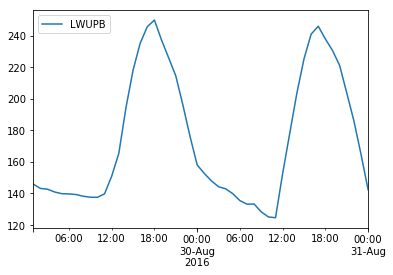

In [36]:
ruralsm.subtract(273.15).plot()

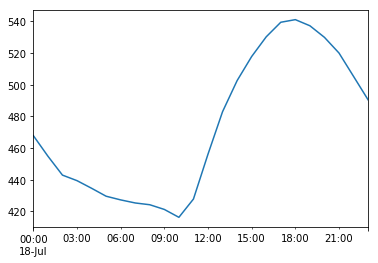

In [21]:
urbanDF[day]['LWUPB'].plot()

In [22]:
urbanDF.head()

T2  SWDNB  SWUPB       LWDNB       LWUPB  \
2016-05-25 00:00:00  293.844879    0.0    0.0    0.000000    0.000000   
2016-05-25 01:00:00  292.456909    0.0    0.0  328.078644  390.076630   
2016-05-25 02:00:00  291.499512    0.0    0.0  325.757965  389.247498   
2016-05-25 03:00:00  290.454529    0.0    0.0  323.606415  388.613831   
2016-05-25 04:00:00  289.643097    0.0    0.0  322.077148  385.508698   

                           LH        HFX     GRDFLX     net_lw      r_net  
2016-05-25 00:00:00  0.000000   0.000000   0.000000   0.000000   0.000000  
2016-05-25 01:00:00  0.543903 -19.091455  42.968956 -61.997986 -61.997986  
2016-05-25 02:00:00  1.955161 -29.257149  36.383656 -63.489532 -63.489532  
2016-05-25 03:00:00  3.177636 -33.787888  33.536289 -65.007416 -65.007416  
2016-05-25 04:00:00  3.160413 -32.730083  33.164253 -63.431549 -63.431549

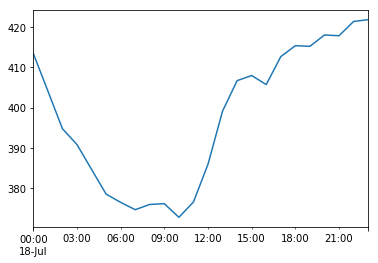

In [24]:
urbanDF[day]['LWDNB'].plot()

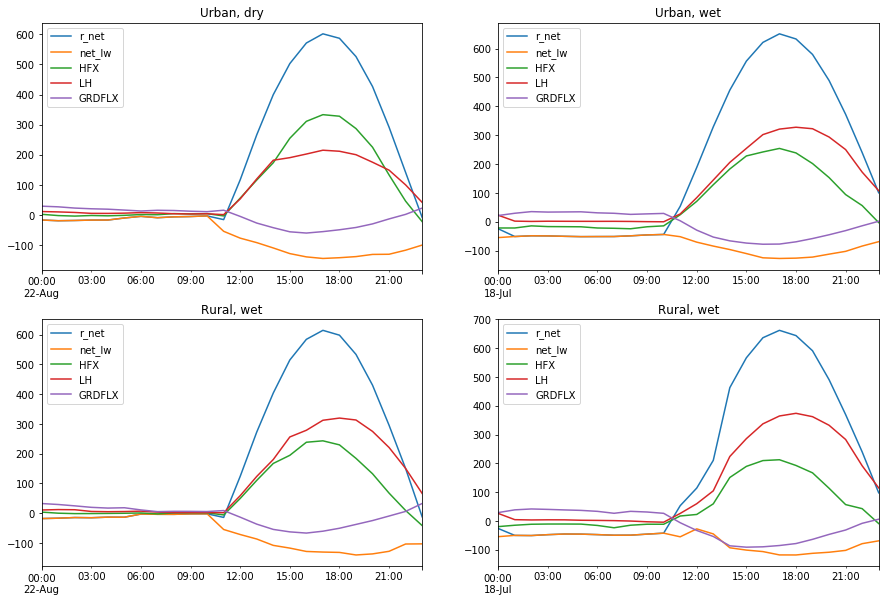

In [18]:
# compute  net_lw
# compute R_net 
# for df in [urbanDF, ruralDF] : 
#     df['net_lw'] = df['LWDNB'] - df['LWUPB']
#     df['r_net'] = df['net_lw'] + df['SWDNB'] - df['SWUPB']
    
vars = ['r_net', 'net_lw', 'HFX', 'LH', 'GRDFLX']

fig = plt.figure(figsize = [15,10])
# plot Urban, dry day 
day = '2016-08-22'
ax = plt.subplot(2,2,1)
urbanDF[day][vars].plot(ax = ax, title = 'Urban, dry')

# plot urban, wet 
day = '2016-07-18'
ax2 = plt.subplot(2,2,2)
urbanDF[day][vars].plot(ax = ax2, title = 'Urban, wet')

# plot rural, dry day
day = '2016-08-22'
ax3 = plt.subplot(2,2,3)
ruralDF[day][vars].plot(ax = ax3, title = 'Rural, wet')

# plot rural, wet day 
day = '2016-07-18'
ax4 = plt.subplot(2,2,4)
ruralDF[day][vars].plot(ax = ax4, title = 'Rural, wet')

array([], shape=(0, 8), dtype=float64)

In [ ]:
# look at diurnal cycle of 

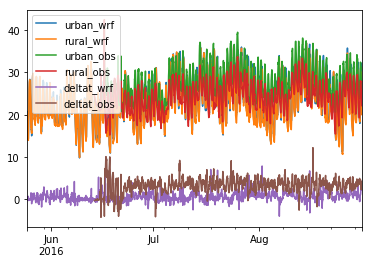

In [20]:
temp.plot()

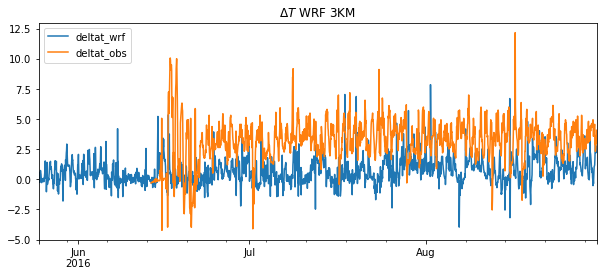

In [35]:
temp[['deltat_wrf', 'deltat_obs']].plot(figsize = [10,4], title = '$\Delta T$ WRF 3KM')
plt.ylabel = ('$^\circ C$')

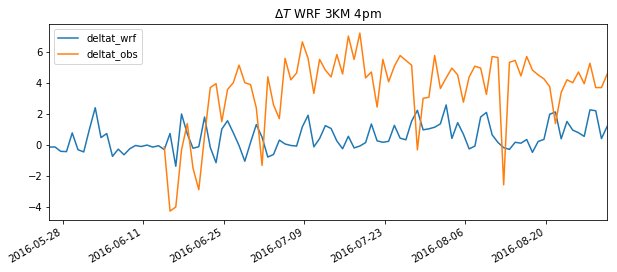

In [39]:
temp[['deltat_wrf', 'deltat_obs']][temp.index.hour==16].plot(figsize = [10,4], title = '$\Delta T$ WRF 3KM 4pm')
plt.ylabel = ('$^\circ C$')

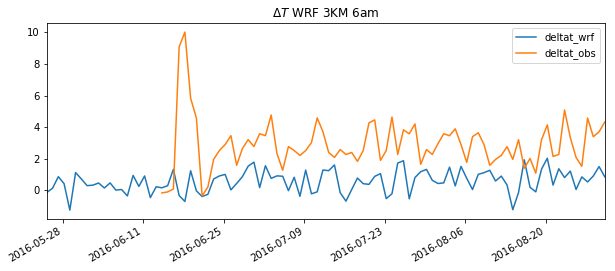

In [37]:
temp[['deltat_wrf', 'deltat_obs']][temp.index.hour==6].plot(figsize = [10,4], title = '$\Delta T$ WRF 3KM 6am')
plt.ylabel = ('$^\circ C$')

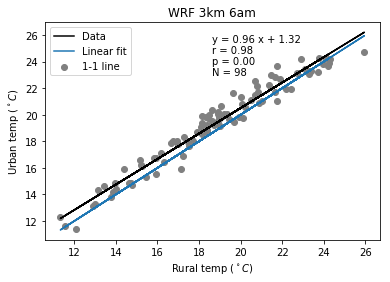

In [30]:
easy_scatter(temp['rural_wrf'][temp.index.hour==6], temp['urban_wrf'][temp.index.hour==6], 'WRF 3km 6am', 'Rural temp ($^\circ C$)', 'Urban temp ($^\circ C$)')
plt.plot(temp['rural_wrf'][temp.index.hour==6],temp['rural_wrf'][temp.index.hour==6])
plt.legend(['Data', 'Linear fit', '1-1 line'])

(-0.034950282059890342, -0.14944574283208209, 0.14190957630591955)

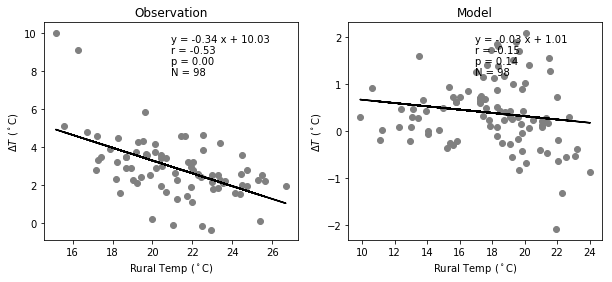

In [29]:
fig = plt.figure(figsize = [10,4])
plt.subplot(1,2,1)
easy_scatter(temp[temp.index.hour==6]['rural_obs'], 
            temp[temp.index.hour==6]['deltat_obs'], 
             'Observation', 'Rural Temp ($^\circ $C)', '$\Delta T$ ($^\circ $C)')
plt.subplot(1,2,2)
easy_scatter(temp[temp.index.hour==10]['rural_wrf'], 
            temp[temp.index.hour==10]['deltat_wrf'],
             'Model', 'Rural Temp ($^\circ $C)', '$\Delta T$ ($^\circ $C)')

In [3]:
# define plots
def easy_scatter(x,y,title='', xlabel='', ylabel='') : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    r, p = scipy.stats.pearsonr(x[ind], y[ind]) #np.corrcoef(x[ind],y[ind])[0,1]
    plt.scatter(x,y, color = 'grey')
    plt.plot(x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('r = %.2f'%(r), xy=(.5, .85), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('p = %.2f'%(p), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('N = %i'%(ind.shape), xy=(.5, .75), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    return m, r, p

In [3]:
filepath = '/Users/ascott47/mountpoint/' #
files = glob.glob(filepath+ 'wrfout*')

In [423]:
from netCDF4 import Dataset as nc
f = nc('/Users/ascott47/mountpoint/wrfout_d01_2016-06-10_15:00:00')
#print f
for v in f.variables: 
    #print f.variables[v]
    try: 
        print(f.variables[v].name, f.variables[v].description)
    except AttributeError: 
        ''

(u'XLAT', u'LATITUDE, SOUTH IS NEGATIVE')
(u'XLONG', u'LONGITUDE, WEST IS NEGATIVE')
(u'LU_INDEX', u'LAND USE CATEGORY')
(u'ZNU', u'eta values on half (mass) levels')
(u'ZNW', u'eta values on full (w) levels')
(u'ZS', u'DEPTHS OF CENTERS OF SOIL LAYERS')
(u'DZS', u'THICKNESSES OF SOIL LAYERS')
(u'VAR_SSO', u'variance of subgrid-scale orography')
(u'U', u'x-wind component')
(u'V', u'y-wind component')
(u'W', u'z-wind component')
(u'PH', u'perturbation geopotential')
(u'PHB', u'base-state geopotential')
(u'T', u'perturbation potential temperature (theta-t0)')
(u'HFX_FORCE', u'SCM ideal surface sensible heat flux')
(u'LH_FORCE', u'SCM ideal surface latent heat flux')
(u'TSK_FORCE', u'SCM ideal surface skin temperature')
(u'HFX_FORCE_TEND', u'SCM ideal surface sensible heat flux tendency')
(u'LH_FORCE_TEND', u'SCM ideal surface latent heat flux tendency')
(u'TSK_FORCE_TEND', u'SCM ideal surface skin temperature tendency')
(u'MU', u'perturbation dry air mass in column')
(u'MUB', u'base stat

In [208]:
# read in temp data 
filepath = '../cityheat/Bmore/2016/'

meta = pd.DataFrame(pd.read_csv(filepath + 'data/CleanedMeta2016.csv', sep = ','))
meta = meta.set_index('sensornumber', drop = False)
meta = meta.set_index(meta.index.astype('float64'), drop = False)
#mean_temp = pd.read_csv('meantemp.csv', header=-1).rename(columns = {0: 'SensorNumber', 1:'MeanTemp'}).set_index('SensorNumber')
tempDF = pd.read_csv(filepath + 'data/CleanedTemp2016.csv', parse_dates = [0]).set_index('Date').resample('H', how = 'first')#.first()
tempDF.columns = tempDF.columns.astype('int')

rhDF = pd.read_csv(filepath + 'data/CleanedRH2016.csv', parse_dates = [0]).set_index('Date').resample('H', how = 'first')
rhDF.columns = rhDF.columns.astype('int')

urban = 97 # science center
rural = 68 # darryn's house

analysis_points = meta.loc[[urban,rural]][['location:Longitude', 'location:Latitude']]

/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()


In [214]:
analysis_points = meta.loc[[urban,rural]][['location:Longitude', 'location:Latitude']]
analysis_points.index = ['urban', 'rural']
analysis_points

location:Longitude  location:Latitude
urban          -76.611088          39.281527
rural          -76.706294          39.479408

In [347]:
# import the dataset and query a point
import scipy.spatial
from netCDF4 import Dataset
from wrf import getvar
ncfile = Dataset('/Users/ascott47/mountpoint/wrfout_d01_2016-06-10_15:00:00')

t2 = getvar(ncfile, "T2")
df = t2.to_dataframe()

tree = KDTree(df[['XLONG', 'XLAT']].values, leafsize = 100)

# urban 
results = tree.query(analysis_points.loc['urban'].values, k = 5, distance_upper_bound=1) # lookup closest points; returns first row as distance and second row as index
urban_location = df.iloc[results[1][0]].name # get the 'name', or coordinate location, of the points

# rural
results = tree.query(analysis_points.loc['rural'].values, k = 5, distance_upper_bound=1) # lookup closest points; returns first row as distance and second row as index
rural_location = df.iloc[results[1][0]].name # get the 'name', or coordinate location, of the points

fig  = (t2-273.15).plot()
ax = fig.get_axes()
ax.scatter(urban_location[1], urban_location[0],  marker = '^', color = 'r')
ax.scatter(rural_location[1],rural_location[0], marker = '+', color = 'r')

In [353]:
import time
files = list(np.sort(glob.glob('/Users/ascott47/mountpoint/wrfout_*')))
urban_temps = np.ones(len(files))
rural_temps = np.ones(len(files))

times = []
i = 0
toc = time.time()
for file in files: 
    ncfile = Dataset(file, 'r')
    urban_temps[i] = ncfile.variables['T2'][:,urban_location[1],urban_location[0]]
    rural_temps[i] = ncfile.variables['T2'][:,rural_location[1],rural_location[0]]

    times.append(file[-19:])
    ncfile.close()
    i = i+1
print time.time() -toc

786.853110075


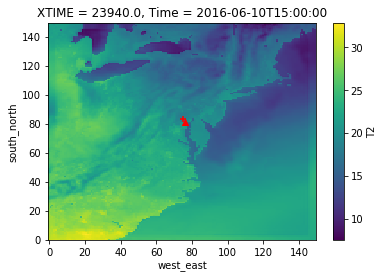

In [465]:
fig  = (t2-273.15).plot()
ax = fig.get_axes()
ax.scatter(urban_location[1], urban_location[0],  marker = '^', color = 'r')
ax.scatter(rural_location[1],rural_location[0], marker = '+', color = 'r')

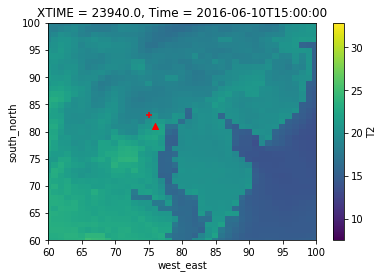

In [354]:
fig  = (t2-273.15).plot()
ax = fig.get_axes()
ax.set_xlim([60,100])
ax.set_ylim([60,100])
ax.scatter(urban_location[1], urban_location[0],  marker = '^', color = 'r')
ax.scatter(rural_location[1],rural_location[0], marker = '+', color = 'r')

In [424]:
variables = ['T2', 'SWDNB', 'SWUPB', 'LWDNB', 'LWUPB', 'LH', 'HFX', 'GRDFLX']

In [461]:
import time
files = list(np.sort(glob.glob('/Users/ascott47/mountpoint/wrfout_*')))
variables = ['T2', 'SWDNB', 'SWUPB', 'LWDNB', 'LWUPB', 'LH', 'HFX', 'GRDFLX']
urban_df = np.ones([len(files), len(variables)])
rural_df = np.ones([len(files), len(variables)])

times = []
i = 0
toc = time.time()
for file in files: 
    ncfile = Dataset(file, 'r')
    variables = ['T2', 'SWDNB', 'SWUPB', 'LWDNB', 'LWUPB', 'LH', 'HFX', 'GRDFLX']
    urban_df[i,:] = [ncfile.variables[x][:,urban_location[1],urban_location[0]] for x in variables]
    rural_df[i,:] = [ncfile.variables[x][:,rural_location[1],rural_location[0]] for x in variables]
    
    times.append(file[-19:])
    ncfile.close()
    i = i+1
print time.time() -toc

urbanDF = pd.DataFrame(urban_df, columns=variables, 
             index = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S'))
ruralDF = pd.DataFrame(rural_df, columns=variables, 
             index = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S'))

urbanDF.to_csv('urban_wrfanalysis.csv')
ruralDF.to_csv('rural_wrfanalysis.csv')

1206.6509099


In [463]:
urbanDF.to_csv('urban_wrfanalysis.csv')
ruralDF.to_csv('rural_wrfanalysis.csv')

In [464]:
1206/60.

20.1

In [355]:
temp = pd.DataFrame([], index = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S'))
temp['urban_wrf'] = urban_temps -273.15
temp['rural_wrf'] = rural_temps -273.15
temp['urban_obs'] = tempDF[urban]
temp['rural_obs'] = tempDF[rural]

temp['deltat_wrf'] = temp['urban_wrf'] - temp['rural_wrf']
temp['deltat_obs'] = temp['urban_obs'] - temp['rural_obs']
#temp.to_csv('wrfanalysis.csv')
temp.head()

urban_wrf  rural_wrf  urban_obs  rural_obs  deltat_wrf  \
2016-05-25 00:00:00  20.764642  20.590112        NaN        NaN    0.174530   
2016-05-25 01:00:00  20.137781  19.821558        NaN        NaN    0.316223   
2016-05-25 02:00:00  18.852289  18.455804        NaN        NaN    0.396484   
2016-05-25 03:00:00  17.494318  17.290521        NaN        NaN    0.203796   
2016-05-25 04:00:00  16.290857  16.370172        NaN        NaN   -0.079315   

                     deltat_obs  
2016-05-25 00:00:00         NaN  
2016-05-25 01:00:00         NaN  
2016-05-25 02:00:00         NaN  
2016-05-25 03:00:00         NaN  
2016-05-25 04:00:00         NaN

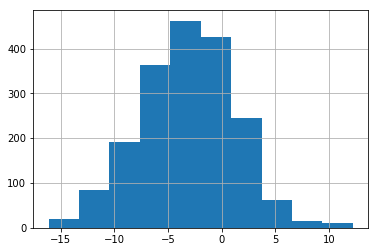

In [357]:
(temp['urban_wrf']-temp['urban_obs']).hist()

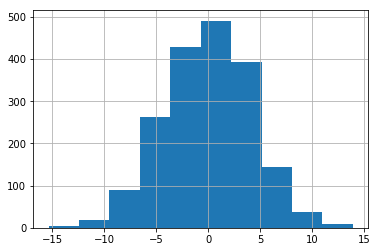

In [358]:
(temp['rural_wrf']-temp['rural_obs']).hist()

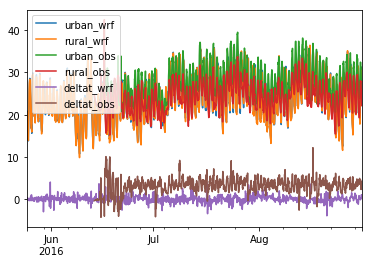

In [359]:
temp.plot()

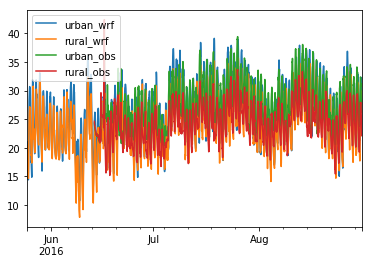

In [289]:
temp.plot()

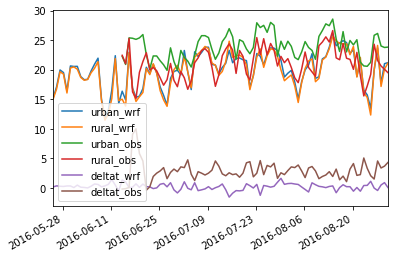

In [360]:
temp[temp.index.hour==6].plot()

(-0.059229170562233244, -0.36646004719519876, 0.00020628092138643171)

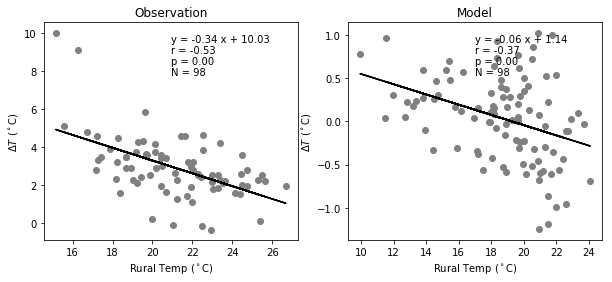

In [497]:
fig = plt.figure(figsize = [10,4])
plt.subplot(1,2,1)
easy_scatter(temp[temp.index.hour==6]['rural_obs'], 
            temp[temp.index.hour==6]['deltat_obs'], 
             'Observation', 'Rural Temp ($^\circ $C)', '$\Delta T$ ($^\circ $C)')
plt.subplot(1,2,2)
easy_scatter(temp[temp.index.hour==10]['rural_wrf'], 
            temp[temp.index.hour==10]['deltat_wrf'],
             'Model', 'Rural Temp ($^\circ $C)', '$\Delta T$ ($^\circ $C)')

Now diagnose why using energy budget variables :
    need R_net, net_lw, sensible heat, latent heat, ground flux
    
    'GRDFLX'  # ground flux
    'LH', latent heat flux

In [ ]:
import time
files = list(np.sort(glob.glob('/Users/ascott47/mountpoint/wrfout_*')))
variables = ['T2', 'SWDNB', 'SWUPB', 'LWDNB', 'LWUPB', 'LH', 'HFX', 'GRDFLX']
urban_df = np.ones([len(files), len(variables)])
rural_df = np.ones([len(files), len(variables)])

times = []
i = 0
toc = time.time()
for file in files: 
    ncfile = Dataset(file, 'r')
    variables = ['T2', 'SWDNB', 'SWUPB', 'LWDNB', 'LWUPB', 'LH', 'HFX', 'GRDFLX']
    urban_df[i,:] = [ncfile.variables[x][:,urban_location[1],urban_location[0]] for x in variables]
    rural_df[i,:] = [ncfile.variables[x][:,rural_location[1],rural_location[0]] for x in variables]
    
    times.append(file[-19:])
    ncfile.close()
    i = i+1
print time.time() -toc

urbanDF = pd.DataFrame(urban_df, columns=variables, 
             index = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S'))
ruralDF = pd.DataFrame(rural_df, columns=variables, 
             index = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S'))

urbanDF.to_csv('urban_wrfanalysis.csv')
ruralDF.to_csv('rural_wrfanalysis.csv')

In [27]:
for file in files[-48:]: 
    sm = 

'/Users/ascott47/mountpoint/wrfout_d01_2016-08-30_23:00:00'

In [472]:
# compute  net_lw
# compute R_net 
for df in [urbanDF, ruralDF] : 
    df['net_lw'] = df['LWDNB'] - df['LWUPB']
    df['r_net'] = df['net_lw'] + df['SWDNB'] - df['SWUPB']

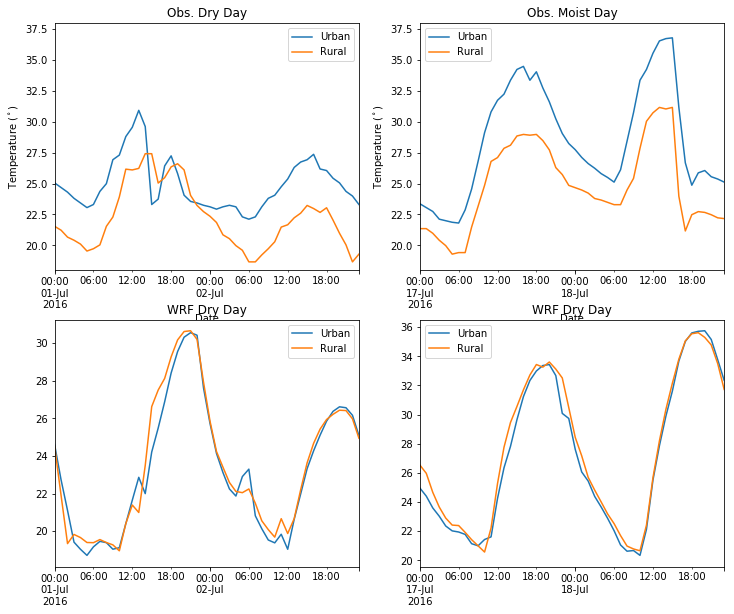

In [489]:
plt.figure(figsize=[12,10])
# plot temperature 
ax = plt.subplot(221)
tempDF[[urban, rural]]['2016-07-01':'2016-07-02'].plot(ax = ax)
plt.legend(['Urban', 'Rural'])
plt.title('Obs. Dry Day')
plt.ylim([18,38])
plt.ylabel('Temperature ($^\circ$)')

ax2 = plt.subplot(222)
tempDF[[urban, rural]]['2016-07-17':'2016-07-18'].plot(ax = ax2)
plt.legend(['Urban', 'Rural'])
plt.title('Obs. Moist Day')
plt.ylim([18,38])
plt.ylabel('Temperature ($^\circ$)')

ax3 = plt.subplot(2,2,3)
(urbanDF['2016-07-01':'2016-07-02']['T2']-273.15).plot(ax = ax3, label = 'Urban')
(ruralDF['2016-07-01':'2016-07-02']['T2']-273.15).plot(ax = ax3, label = 'Rural')
ax3.set_title('WRF Dry Day')
plt.legend()

ax4 = plt.subplot(2,2,4)
(urbanDF['2016-07-17':'2016-07-18']['T2']-273.15).plot(ax = ax4, label = 'Urban')
(ruralDF['2016-07-17':'2016-07-18']['T2']-273.15).plot(ax = ax4, label = 'Rural')
ax4.set_title('WRF Dry Day')
plt.legend()

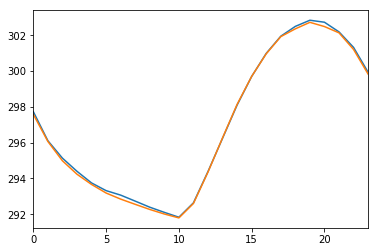

In [496]:
urbanDF['T2'].groupby(urbanDF.index.hour).mean().plot()
ruralDF['T2'].groupby(urbanDF.index.hour).mean().plot()

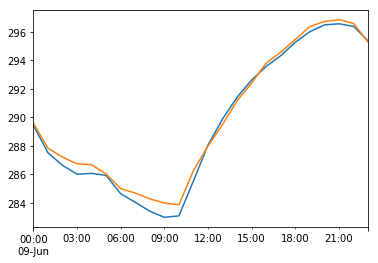

In [494]:
ruralDF['2016-06-09']['T2'].plot()
urbanDF['2016-06-09']['T2'].plot()

In [490]:
ruralDF['T2'].argmin()

Timestamp('2016-06-09 09:00:00')

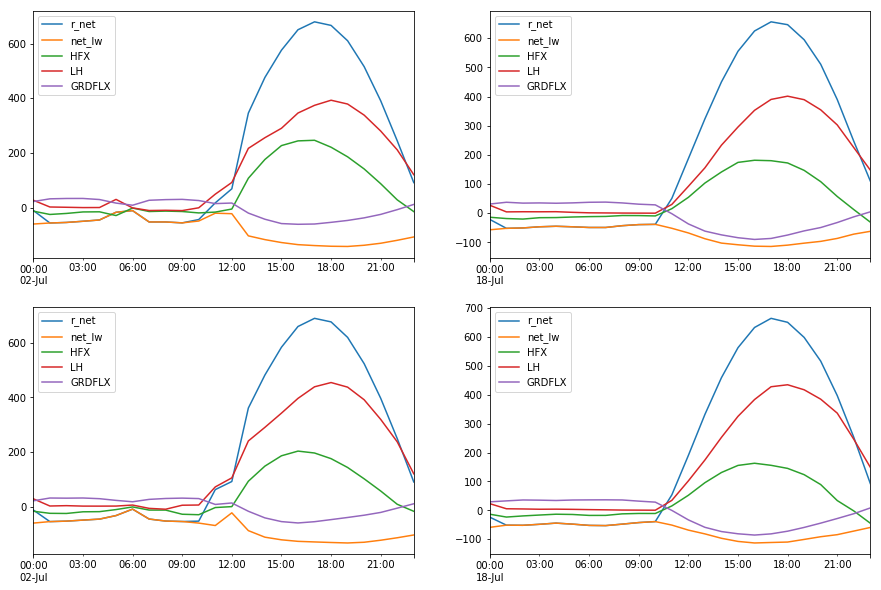

In [480]:
# plot energy balance 
vars = ['r_net', 'net_lw', 'HFX', 'LH', 'GRDFLX']

fig = plt.figure(figsize = [15,10])
# plot Urban, dry day 
day = '2016-07-02'
ax = plt.subplot(2,2,1)
urbanDF[day][vars].plot(ax = ax)

# plot urban, wet 
day = '2016-07-18'
ax2 = plt.subplot(2,2,2)
urbanDF[day][vars].plot(ax = ax2)

# plot rural, dry day
day = '2016-07-02'
ax3 = plt.subplot(2,2,3)
ruralDF[day][vars].plot(ax = ax3)

# plot rural, wet day 
day = '2016-07-18'
ax4 = plt.subplot(2,2,4)
ruralDF[day][vars].plot(ax = ax4)


# Conclusions 

Wrf reasonably reproduces the temperatures observed during July 2016. We see the desired effect of urban-rural temperature differences decreasing with higher rural temperatures. However, WRF at this resolution underestimates urban temperatures, and does not reproduce the phenomena of higher nighttime urban temperatures during moist weather types.

Additionally, the timing of temperature is unexpected- WRF shows minimum daily temperature occuring at 10am rather than 6am as is observed. 

In [368]:
ds = xr.open_dataset('/Users/ascott47/mountpoint/wrfout_d01_2016-06-10_15:00:00')

In [135]:
ncfile = Dataset('/Users/ascott47/mountpoint/wrfout_d01_2016-06-10_15:00:00')
ncfile.variables['T2']

<type 'netCDF4._netCDF4.Variable'>
float32 T2(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: TEMP at 2 M
    units: K
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (1, 150, 150)
filling on, default _FillValue of 9.96920996839e+36 used

In [136]:
ncfile.variables['T2'].shape

(1, 150, 150)

In [138]:
lats = ncfile.variables['XLAT']

In [152]:
ncfile.variables['T2'][]

<type 'netCDF4._netCDF4.Variable'>
float32 T2(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: TEMP at 2 M
    units: K
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (1, 150, 150)
filling on, default _FillValue of 9.96920996839e+36 used

In [77]:
lats = t2.coords['XLAT']
lons = t2.coords['XLONG']
arrays = [lats,lons]
tuples = list(zip(*arrays))

In [86]:
t2.coords['XLAT'].shape

(150, 150)

In [81]:
index = pd.MultiIndex.from_tuples(tuples, names = ['lat', 'lon'])
pd.DataFrame(t2.values, index = index)

0           1           2           3    \
lat       lon                                                          
32.288532 -83.914856  303.862976  303.790161  303.871948  304.044037   
32.296291 -83.818634  303.630737  303.457520  303.539886  303.645966   
32.303955 -83.722382  303.426178  303.414948  303.593628  303.659302   
32.311523 -83.626129  303.289673  303.220947  303.543976  303.743744   
32.318993 -83.529846  303.185303  303.171783  303.342194  303.897400   
32.326363 -83.433533  303.132446  302.865692  303.180328  303.254150   
32.333637 -83.337219  303.087250  303.109741  302.964600  303.767883   
32.340801 -83.240875  302.935669  302.990295  302.885925  303.763702   
32.347874 -83.144501  302.570862  302.649963  302.803406  302.807495   
32.354858 -83.048126  302.257721  302.682220  303.021545  302.617401   
32.361744 -82.951721  302.096741  302.374298  302.562134  302.326050   
32.368519 -82.855286  302.082031  302.410370  302.389404  302.158844   
32.375214 -82.758850  302.113159  302.336060  302.271790  302.208984   
32.381798 -82.662384  302.043549  302.196564  302.293091  302.352600   
32.388287 -82.565887  302.245087  302.325867  302.295502  302.149597   
32.394680 -82.469391  302.335663  302.291382  302.201233  301.893707   
32.400978 -82.372864  302.231903  302.024597  302.445984  301.954010   
32.407173 -82.276337  302.158966  302.216980  301.478241  301.328766   
32.413265 -82.179779  301.845642  301.503571  301.341461  301.502441   
32.419262 -82.083221  301.627869  301.143524  301.280304  301.676636   
32.425163 -81.986633  301.494537  301.614014  301.264832  301.493011   
32.430969 -81.890015  301.338989  301.425537  301.050568  301.112091   
32.436672 -81.793396  300.822937  301.191895  301.077942  301.486023   
32.442280 -81.696777  301.218933  298.533051  300.890839  301.114685   
32.447792 -81.600098  301.155060  301.238861  298.479004  301.076996   
32.453194 -81.503448  300.877319  301.107788  301.399933  301.290436   
32.458508 -81.406738  299.891663  300.408142  300.996094  300.655792   
32.463711 -81.310059  299.466370  300.003571  300.289093  300.218292   
32.468826 -81.213348  297.893372  298.619690  299.440186  299.750488   
32.473843 -81.116608  296.867523  297.273193  297.553650  297.860382   
...                          ...         ...         ...         ...   
32.516052 -72.290283  298.062439  298.008698  297.945892  297.953766   
32.511959 -72.193420  297.992798  297.943146  297.873505  297.855255   
32.507759 -72.096588  298.353729  297.817932  297.725464  297.910095   
32.503483 -71.999756  297.733368  297.595917  297.582764  297.583374   
32.499084 -71.902954  297.466583  297.414673  297.404419  297.468018   
32.494606 -71.806152  297.527161  297.357452  297.293274  297.325775   
32.490017 -71.709351  297.596680  297.384949  297.278229  297.290588   
32.485344 -71.612579  297.433289  297.319214  297.275940  297.326324   
32.480556 -71.515839  297.342590  297.316895  297.349548  297.411865   
32.475677 -71.419067  297.145935  297.175140  297.238007  297.284912   
32.470692 -71.322357  297.072571  297.028931  296.974457  297.019012   
32.465618 -71.225616  296.680115  296.580994  296.527985  296.820129   
32.460442 -71.128906  296.439301  296.349762  296.213745  296.297211   
32.455166 -71.032227  296.228821  296.091858  295.872955  295.901123   
32.449799 -70.935547  296.037262  295.888184  295.681183  295.695618   
32.444313 -70.838898  295.878143  295.731201  295.521362  295.544281   
32.438755 -70.742249  295.661224  295.476044  295.350739  295.333923   
32.433086 -70.645630  295.413422  295.342743  295.161194  295.220764   
32.427322 -70.549011  295.295654  295.275787  295.062866  295.173126   
32.421455 -70.452423  295.306763  295.238373  295.004181  295.090240   
32.415485 -70.355835  295.479218  295.427246  295.695679  295.164093   
32.409439 -70.259277  294.997559  295.132233  295.088074  295.267670   
32.403271 -70.162750  294.908356  294.954926  295.130371  295.094360 

In [2]:
ds = xr.open_dataset('/Users/ascott47/mountpoint/wrfout_d01_2016-06-10_15:00:00')

In [3]:
ds

<xarray.Dataset>
Dimensions:                (Time: 1, bottom_top: 112, bottom_top_stag: 113, soil_layers_stag: 4, south_north: 150, south_north_stag: 151, west_east: 150, west_east_stag: 151)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 32.2885 ...
    XLONG                  (Time, south_north, west_east) float32 -83.9149 ...
    XTIME                  (Time) datetime64[ns] 2016-06-10T15:00:00
    XLAT_U                 (Time, south_north, west_east_stag) float32 32.2846 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 -83.963 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 32.2479 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 -83.9102 ...
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, soil_layers_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times                  (Time) |S19 '2016-06-10_15:00:00'
    LU_INDEX     

In [39]:
ds['T2'].to_dataframe()

XLAT      XLONG               XTIME  \
Time south_north west_east                                             
0    0           0          32.288532 -83.914856 2016-06-10 15:00:00   
                 1          32.296291 -83.818634 2016-06-10 15:00:00   
                 2          32.303955 -83.722382 2016-06-10 15:00:00   
                 3          32.311523 -83.626129 2016-06-10 15:00:00   
                 4          32.318993 -83.529846 2016-06-10 15:00:00   
                 5          32.326363 -83.433533 2016-06-10 15:00:00   
                 6          32.333637 -83.337219 2016-06-10 15:00:00   
                 7          32.340801 -83.240875 2016-06-10 15:00:00   
                 8          32.347874 -83.144501 2016-06-10 15:00:00   
                 9          32.354858 -83.048126 2016-06-10 15:00:00   
                 10         32.361744 -82.951721 2016-06-10 15:00:00   
                 11         32.368519 -82.855286 2016-06-10 15:00:00   
                 12         32.375214 -82.758850 2016-06-10 15:00:00   
                 13         32.381798 -82.662384 2016-06-10 15:00:00   
                 14         32.388287 -82.565887 2016-06-10 15:00:00   
                 15         32.394680 -82.469391 2016-06-10 15:00:00   
                 16         32.400978 -82.372864 2016-06-10 15:00:00   
                 17         32.407173 -82.276337 2016-06-10 15:00:00   
                 18         32.413265 -82.179779 2016-06-10 15:00:00   
                 19         32.419262 -82.083221 2016-06-10 15:00:00   
                 20         32.425163 -81.986633 2016-06-10 15:00:00   
                 21         32.430969 -81.890015 2016-06-10 15:00:00   
                 22         32.436672 -81.793396 2016-06-10 15:00:00   
                 23         32.442280 -81.696777 2016-06-10 15:00:00   
                 24         32.447792 -81.600098 2016-06-10 15:00:00   
                 25         32.453194 -81.503448 2016-06-10 15:00:00   
                 26         32.458508 -81.406738 2016-06-10 15:00:00   
                 27         32.463711 -81.310059 2016-06-10 15:00:00   
                 28         32.468826 -81.213348 2016-06-10 15:00:00   
                 29         32.473843 -81.116608 2016-06-10 15:00:00   
...                               ...        ...                 ...   
     149         120        44.876919 -71.419006 2016-06-10 15:00:00   
                 121        44.871799 -71.300964 2016-06-10 15:00:00   
                 122        44.866558 -71.182922 2016-06-10 15:00:00   
                 123        44.861195 -71.064880 2016-06-10 15:00:00   
                 124        44.855705 -70.946899 2016-06-10 15:00:00   
                 125        44.850101 -70.828918 2016-06-10 15:00:00   
                 126        44.844364 -70.710968 2016-06-10 15:00:00   
                 127        44.838516 -70.593018 2016-06-10 15:00:00   
                 128        44.832535 -70.475128 2016-06-10 15:00:00   
                 129        44.826431 -70.357239 2016-06-10 15:00:00   
                 130        44.820210 -70.239410 2016-06-10 15:00:00   
                 131        44.813858 -70.121582 2016-06-10 15:00:00   
                 132        44.807392 -70.003784 2016-06-10 15:00:00   
                 133        44.800797 -69.885986 2016-06-10 15:00:00   
                 134        44.794079 -69.768250 2016-06-10 15:00:00   
                 135        44.787239 -69.650543 2016-06-10 15:00:00   
                 136        44.780281 -69.532837 2016-06-10 15:00:00   
                 137        44.773190 -69.415192 2016-06-10 15:00:00   
                 138        44.765984 -69.297577 2016-06-10 15:00:00   
                 139        44.758652 -69.179962 2016-06-10 15:00:00   
                 140        44.751205 -69.062408 2016-06-10 15:00:00   
                 141        44.743629 -68.944855 2016-06-10 15:00:00   
                 142        44.735931 -68.827362 2016-06-10 15:00:00   
 

In [34]:
ds.T2.loc[dict(south_north = 32.2885)]

AssertionError: (2, 3)

In [29]:
ds.T2.loc[dict(XLAT = 32.2885, XLONG = -83.9149)]
#ds.T2.loc[dict(XLAT = 39.281527, XLONG = -76.611088)]

ValueError: dimensions or multi-index levels ['XLONG', 'XLAT'] do not exist

In [203]:
# read in temp data 
filepath = '../cityheat/Bmore/2016/'

meta = pd.DataFrame(pd.read_csv(filepath + 'data/CleanedMeta2016.csv', sep = ','))
meta = meta.set_index('sensornumber', drop = False)
meta = meta.set_index(meta.index.astype('float64'), drop = False)
#mean_temp = pd.read_csv('meantemp.csv', header=-1).rename(columns = {0: 'SensorNumber', 1:'MeanTemp'}).set_index('SensorNumber')
tempDF = pd.read_csv(filepath + 'data/CleanedTemp2016.csv', parse_dates = [0]).set_index('Date').resample('H', how = 'first')#.first()
tempDF.columns = tempDF.columns.astype('int')

rhDF = pd.read_csv(filepath + 'data/CleanedRH2016.csv', parse_dates = [0]).set_index('Date').resample('H', how = 'first')
rhDF.columns = rhDF.columns.astype('int')

urban = 97 # science center
rural = 68 # darryn's house

/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()


In [204]:
meta.loc[[urban,rural]][['location:Latitude', 'location:Longitude']]

location:Latitude  location:Longitude
sensornumber                                       
97                    39.281527          -76.611088
68                    39.479408          -76.706294

In [5]:
from netCDF4 import Dataset
from wrf import getvar

ncfile = Dataset('/Users/ascott47/mountpoint/wrfout_d01_2016-06-10_15:00:00')

# Get the Sea Level Pressure
slp = getvar(ncfile, "T2")


ImportError: dlopen(/Users/ascott47/anaconda/lib/python3.6/site-packages/netCDF4/_netCDF4.cpython-36m-darwin.so, 2): Library not loaded: @rpath/libmfhdf.0.dylib
  Referenced from: /Users/ascott47/anaconda/lib/libnetcdf.11.dylib
  Reason: image not found